# Lectures 22-24

## Random Numbers

__Note:__ I’m first going to show you the old way of generating random numbers in NumPy. If you’re reading older code, this is likely the way you’ll see random numbers generated. All new code should be written using the new method that I show you.

__Older Method:__ Don't use this!

In [1]:
import numpy as np

In [2]:
np.random.randint(-22, 39,size=(2,5))

array([[ -5,  37, -18,  -2,  -1],
       [ -6,  31,   6, -21,  36]])

In [3]:
help(np.random.randint)

Help on built-in function randint:

randint(...) method of numpy.random.mtrand.RandomState instance
    randint(low, high=None, size=None, dtype=int)

    Return random integers from `low` (inclusive) to `high` (exclusive).

    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).

    .. note::
        New code should use the `~numpy.random.Generator.integers`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.

    Parameters
    ----------
    low : int or array-like of ints
        Lowest (signed) integers to be drawn from the distribution (unless
        ``high=None``, in which case this parameter is one above the
        *highest* such integer).
    high : int or array-like of ints, optional
        If provided, one above the largest (signed) integer to be drawn
     

__New Method:__ This is an example of object oriented programming (OOP)

In [4]:
rng = np.random.default_rng()

In [5]:
type(rng)

numpy.random._generator.Generator

* Make a length 10 NumPy array of random integers between 0 (inclusive) and 39 (exclusive).

In [6]:
arr = rng.integers(0,39,size=10)

In [7]:
arr

array([27,  6, 25,  3, 16,  5, 11, 30, 28,  2], dtype=int64)

* Choose five of those numbers (with replacement) and put them into a NumPy array.

In [8]:
rng.choice(arr,size=5)

array([ 3, 25,  6,  3,  5], dtype=int64)

In [9]:
help(rng.choice)

Help on built-in function choice:

choice(...) method of numpy.random._generator.Generator instance
    choice(a, size=None, replace=True, p=None, axis=0, shuffle=True)

    Generates a random sample from a given array

    Parameters
    ----------
    a : {array_like, int}
        If an ndarray, a random sample is generated from its elements.
        If an int, the random sample is generated from np.arange(a).
    size : {int, tuple[int]}, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn from the 1-d `a`. If `a` has more
        than one dimension, the `size` shape will be inserted into the
        `axis` dimension, so the output ``ndim`` will be ``a.ndim - 1 +
        len(size)``. Default is None, in which case a single value is
        returned.
    replace : bool, optional
        Whether the sample is with or without replacement. Default is True,
        meaning that a value of ``a`` can be selected multiple 

In [10]:
arr2 = np.arange(0,100,3)
print(arr2)

[ 0  3  6  9 12 15 18 21 24 27 30 33 36 39 42 45 48 51 54 57 60 63 66 69
 72 75 78 81 84 87 90 93 96 99]


In [11]:
rng.choice(arr2,size=5)

array([27, 12, 66, 57, 60])

### Create a $3 \times 5$ NumPy array of random real numbers between -1 and 4.

You might expect this to work, but it won't :(

In [12]:
rng.random(-1,4,size=(3,5))

TypeError: random() got multiple values for keyword argument 'size'

In [13]:
help(rng.random)

Help on built-in function random:

random(...) method of numpy.random._generator.Generator instance
    random(size=None, dtype=np.float64, out=None)

    Return random floats in the half-open interval [0.0, 1.0).

    Results are from the "continuous uniform" distribution over the
    stated interval.  To sample :math:`Unif[a, b), b > a` use `uniform`
    or multiply the output of `random` by ``(b - a)`` and add ``a``::

        (b - a) * random() + a

    Parameters
    ----------
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    dtype : dtype, optional
        Desired dtype of the result, only `float64` and `float32` are supported.
        Byteorder must be native. The default value is np.float64.
    out : ndarray, optional
        Alternative output array in which to place the result. If size is not None,
 

In [14]:
#3x5 array of random reals between 0 and 1
rng.random((3,5))

array([[0.45189637, 0.28298168, 0.71302606, 0.11611723, 0.69248411],
       [0.10829207, 0.21174047, 0.97924302, 0.99517121, 0.12283039],
       [0.72709658, 0.03833569, 0.56616399, 0.60971177, 0.84214659]])

In [15]:
#Mult. by 5 to stretch to correct length
5*rng.random((3,5))

array([[3.44584341, 0.80122559, 4.15508792, 1.68190837, 1.13223964],
       [3.82659211, 4.55850676, 2.78048203, 3.67432533, 3.55187541],
       [3.36452635, 4.45129499, 2.9166865 , 0.61005391, 0.64095524]])

In [16]:
#subtract 1 to shift to correct interval.
5*rng.random((3,5))-1

array([[ 2.5338375 ,  1.91829307,  2.55996587,  2.99846598,  0.44500195],
       [ 1.26961066,  0.97584872,  3.15536889,  3.31662461,  3.70231894],
       [-0.7357316 ,  2.65955489,  3.48273625,  0.62802291,  2.14423118]])

Running the above cell a few times, we see that we can get pretty close to both -1 and 4.

* Create a length 10 NumPy array of random numbers that follow a normal distribution with mean 2 and standard deviation 0.1.

This isn't super important for our class, I just wanted to show it as an example.

In [17]:
help(rng.normal)

Help on built-in function normal:

normal(...) method of numpy.random._generator.Generator instance
    normal(loc=0.0, scale=1.0, size=None)

    Draw random samples from a normal (Gaussian) distribution.

    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).

    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.

    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution.
    scale : float or array_like of floats
        Standard deviation (spread or "width") of the distribution. Must be
        non-negative.
    size : int or tuple of ints,

In [18]:
rng.normal(2,0.1,size=10)

array([2.04872393, 2.1200825 , 1.82795901, 1.84837639, 2.00548003,
       1.86653844, 2.07194693, 1.95303345, 1.85075456, 2.17810583])

Notice: the values are clustered around 2, and if they deviate from the average, it's likely within 0.1.

More specifically (according to stats or probability), 68% of values lie within one standard deviation, i.e. $ \pm 0.1$, of the mean 2. 

95% of values lie within 2 standard deviations, i.e. $ \pm 0.2$, of the mean 2.

### Broadcasting in Numpy

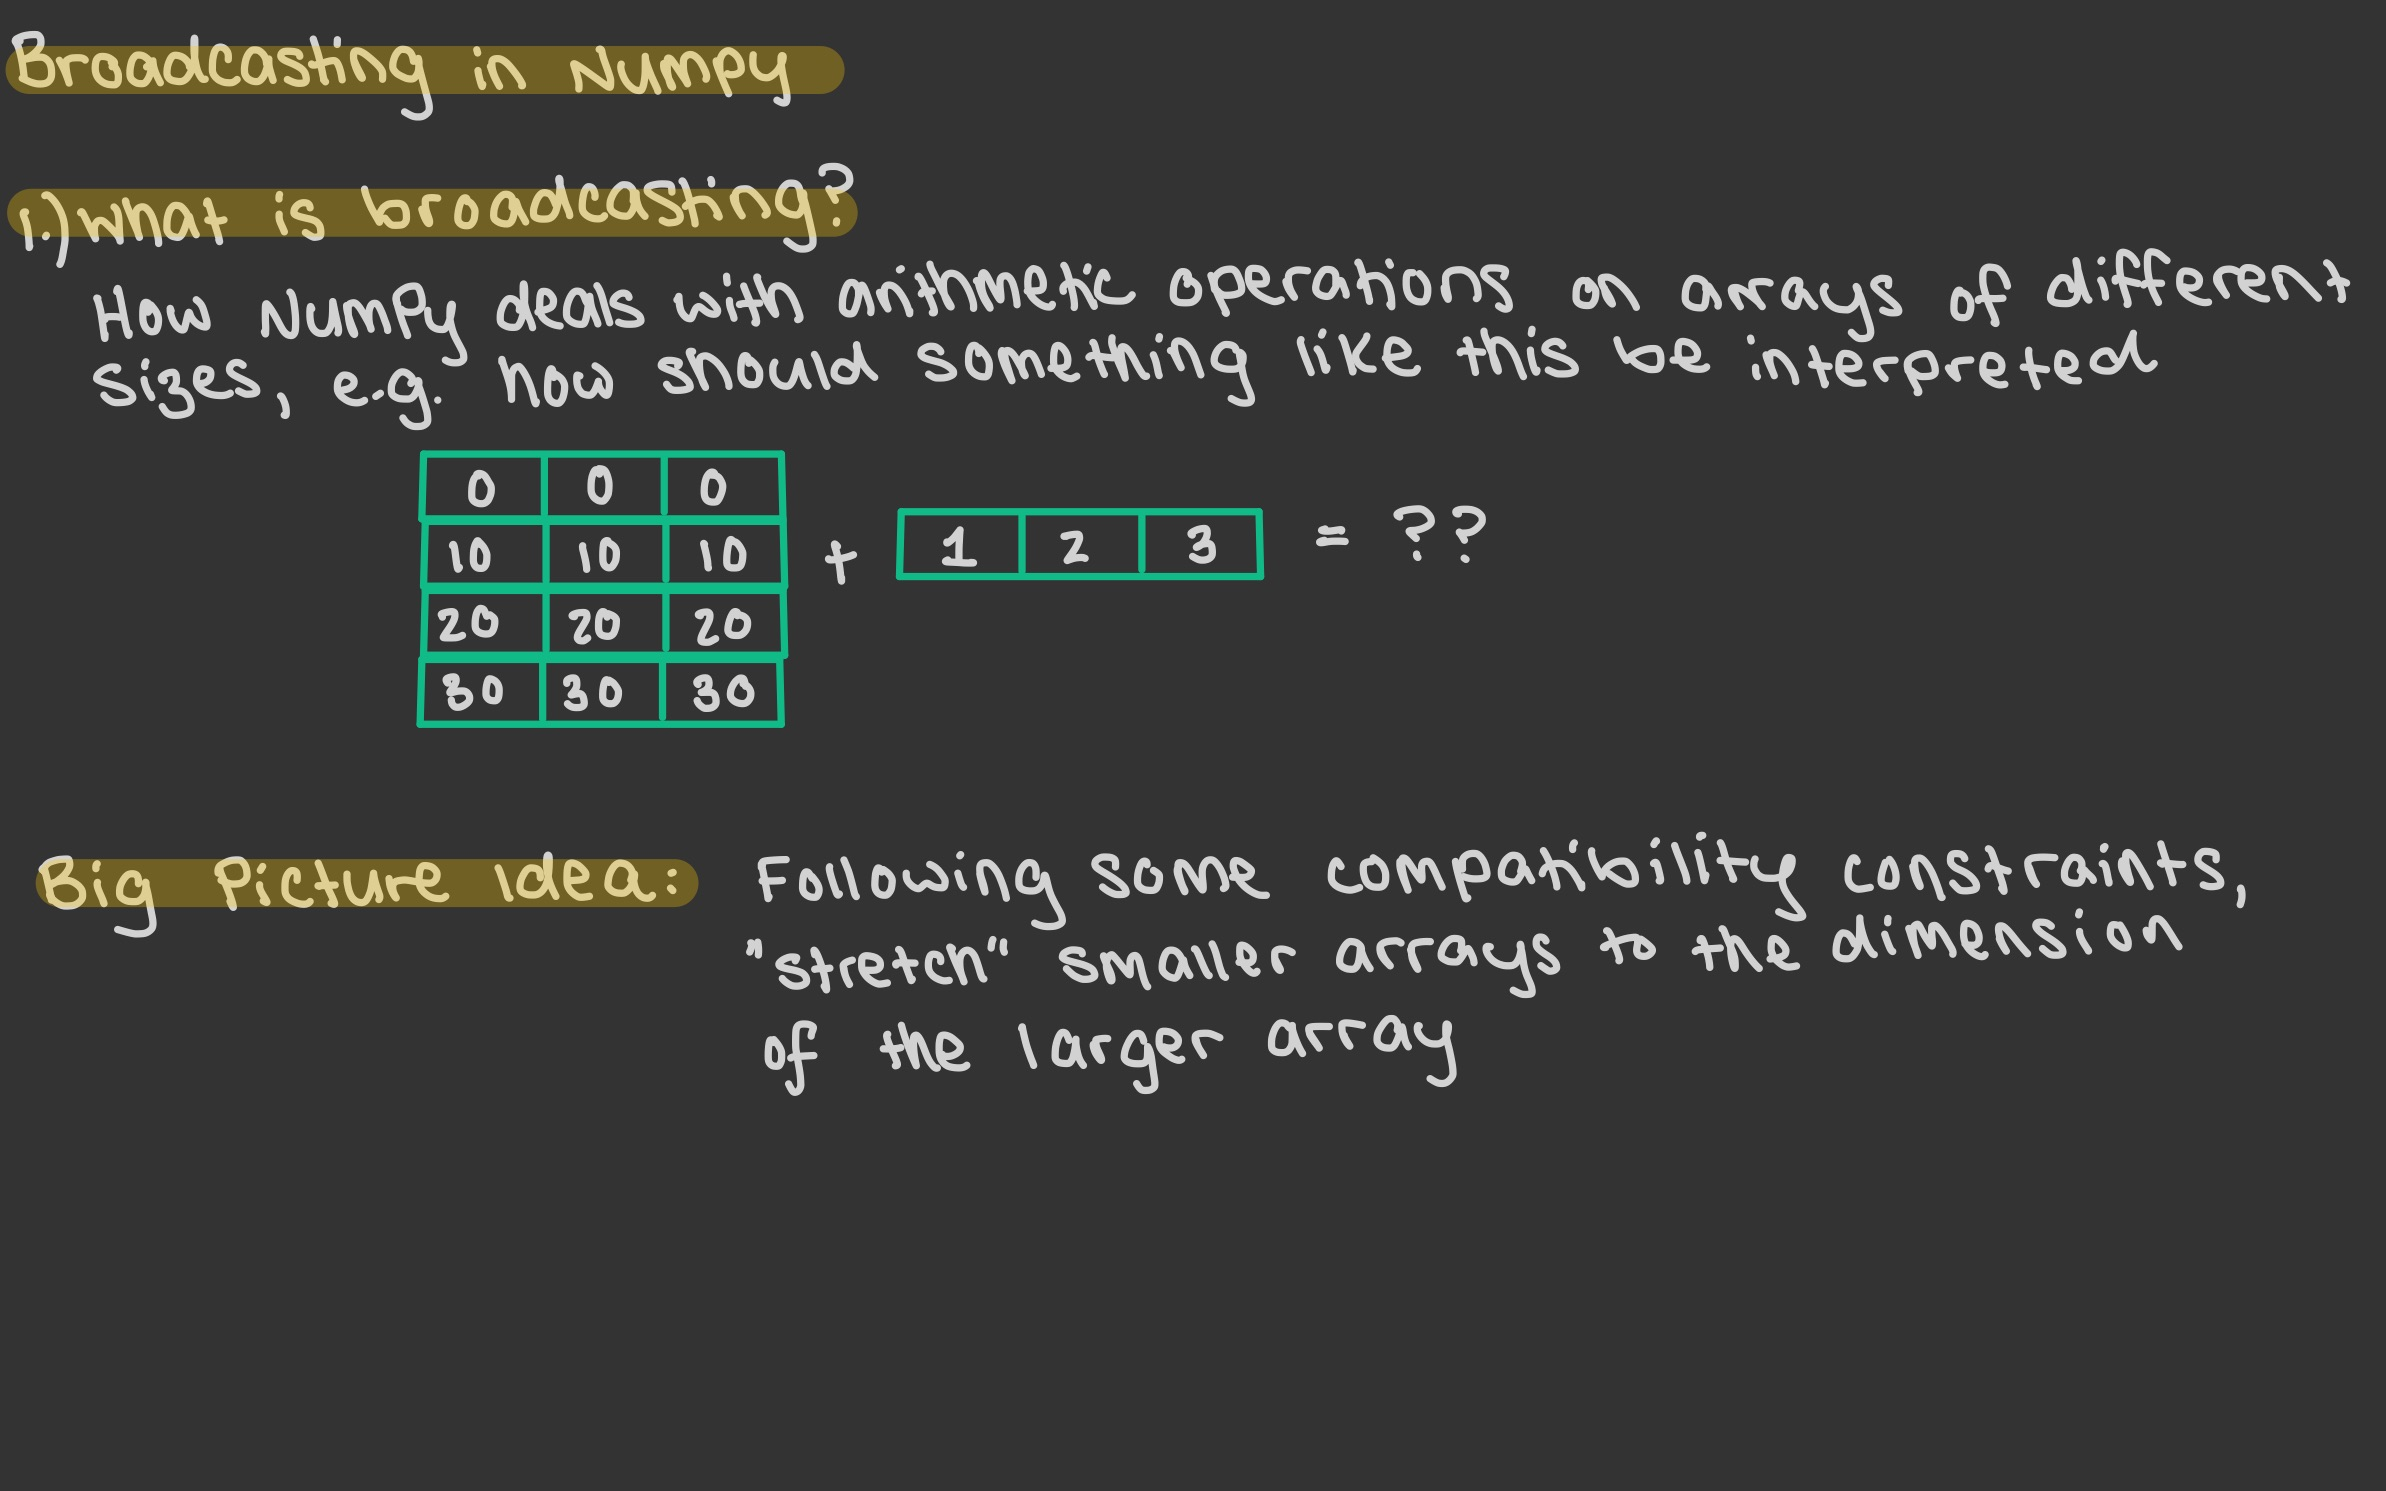
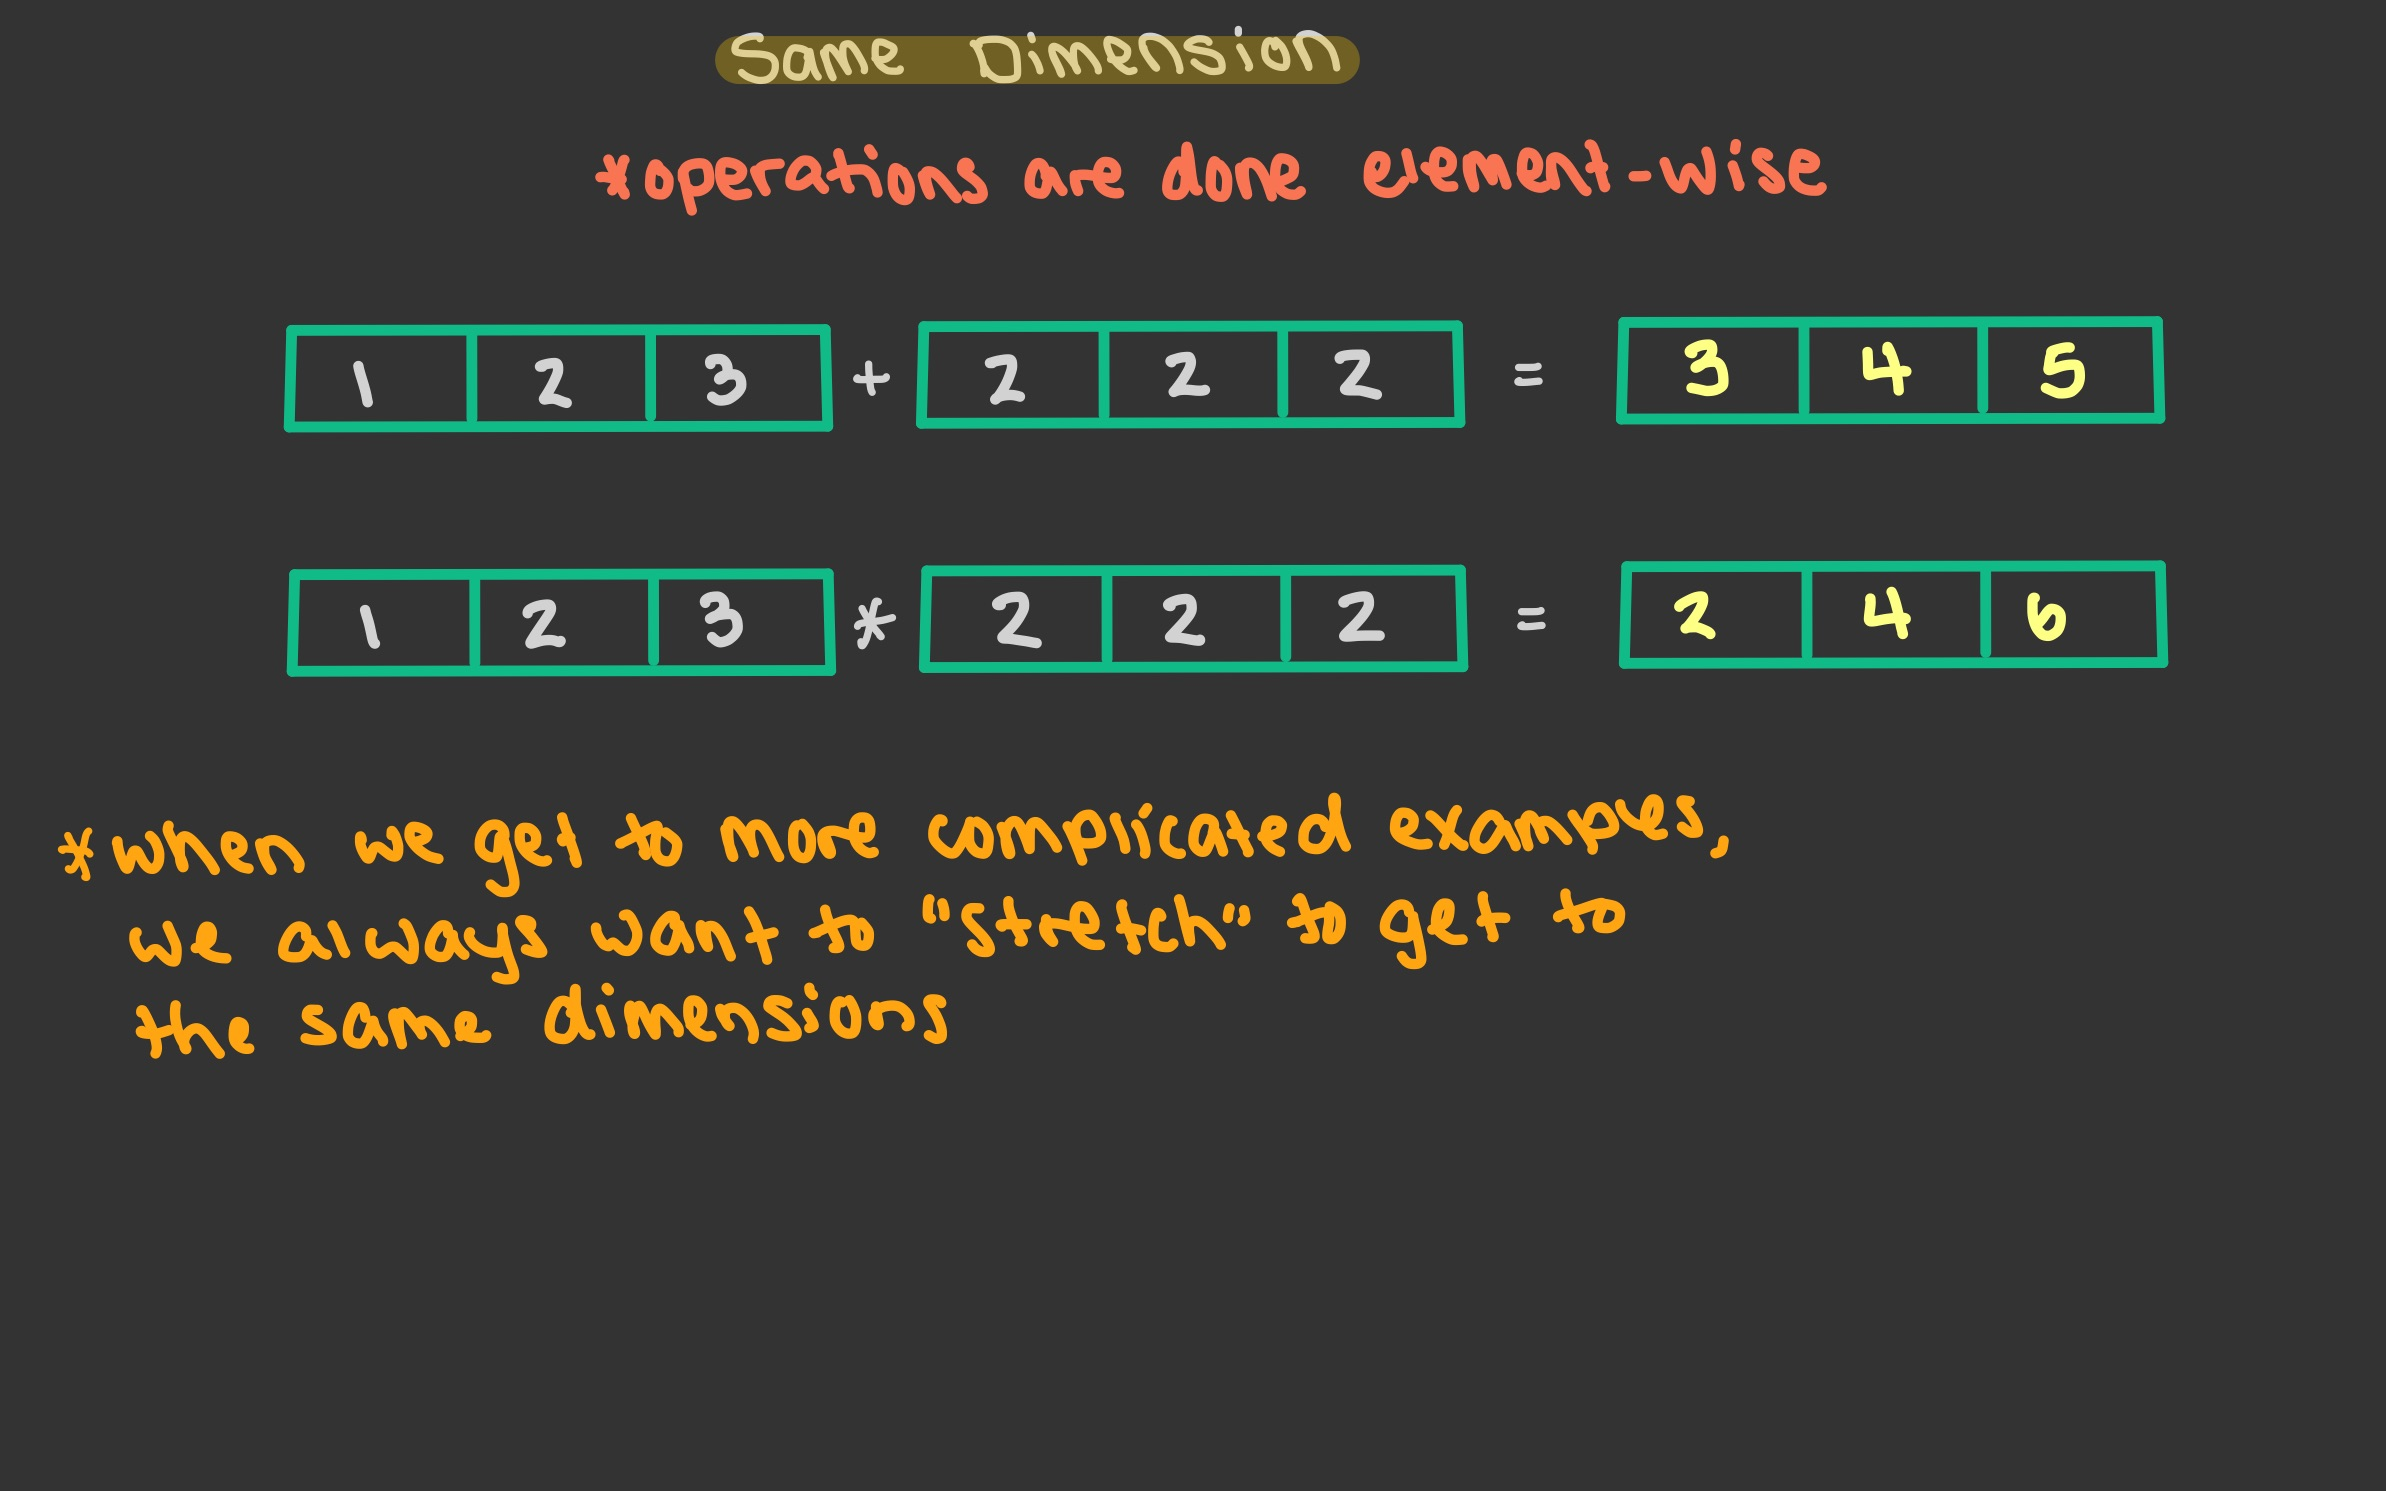
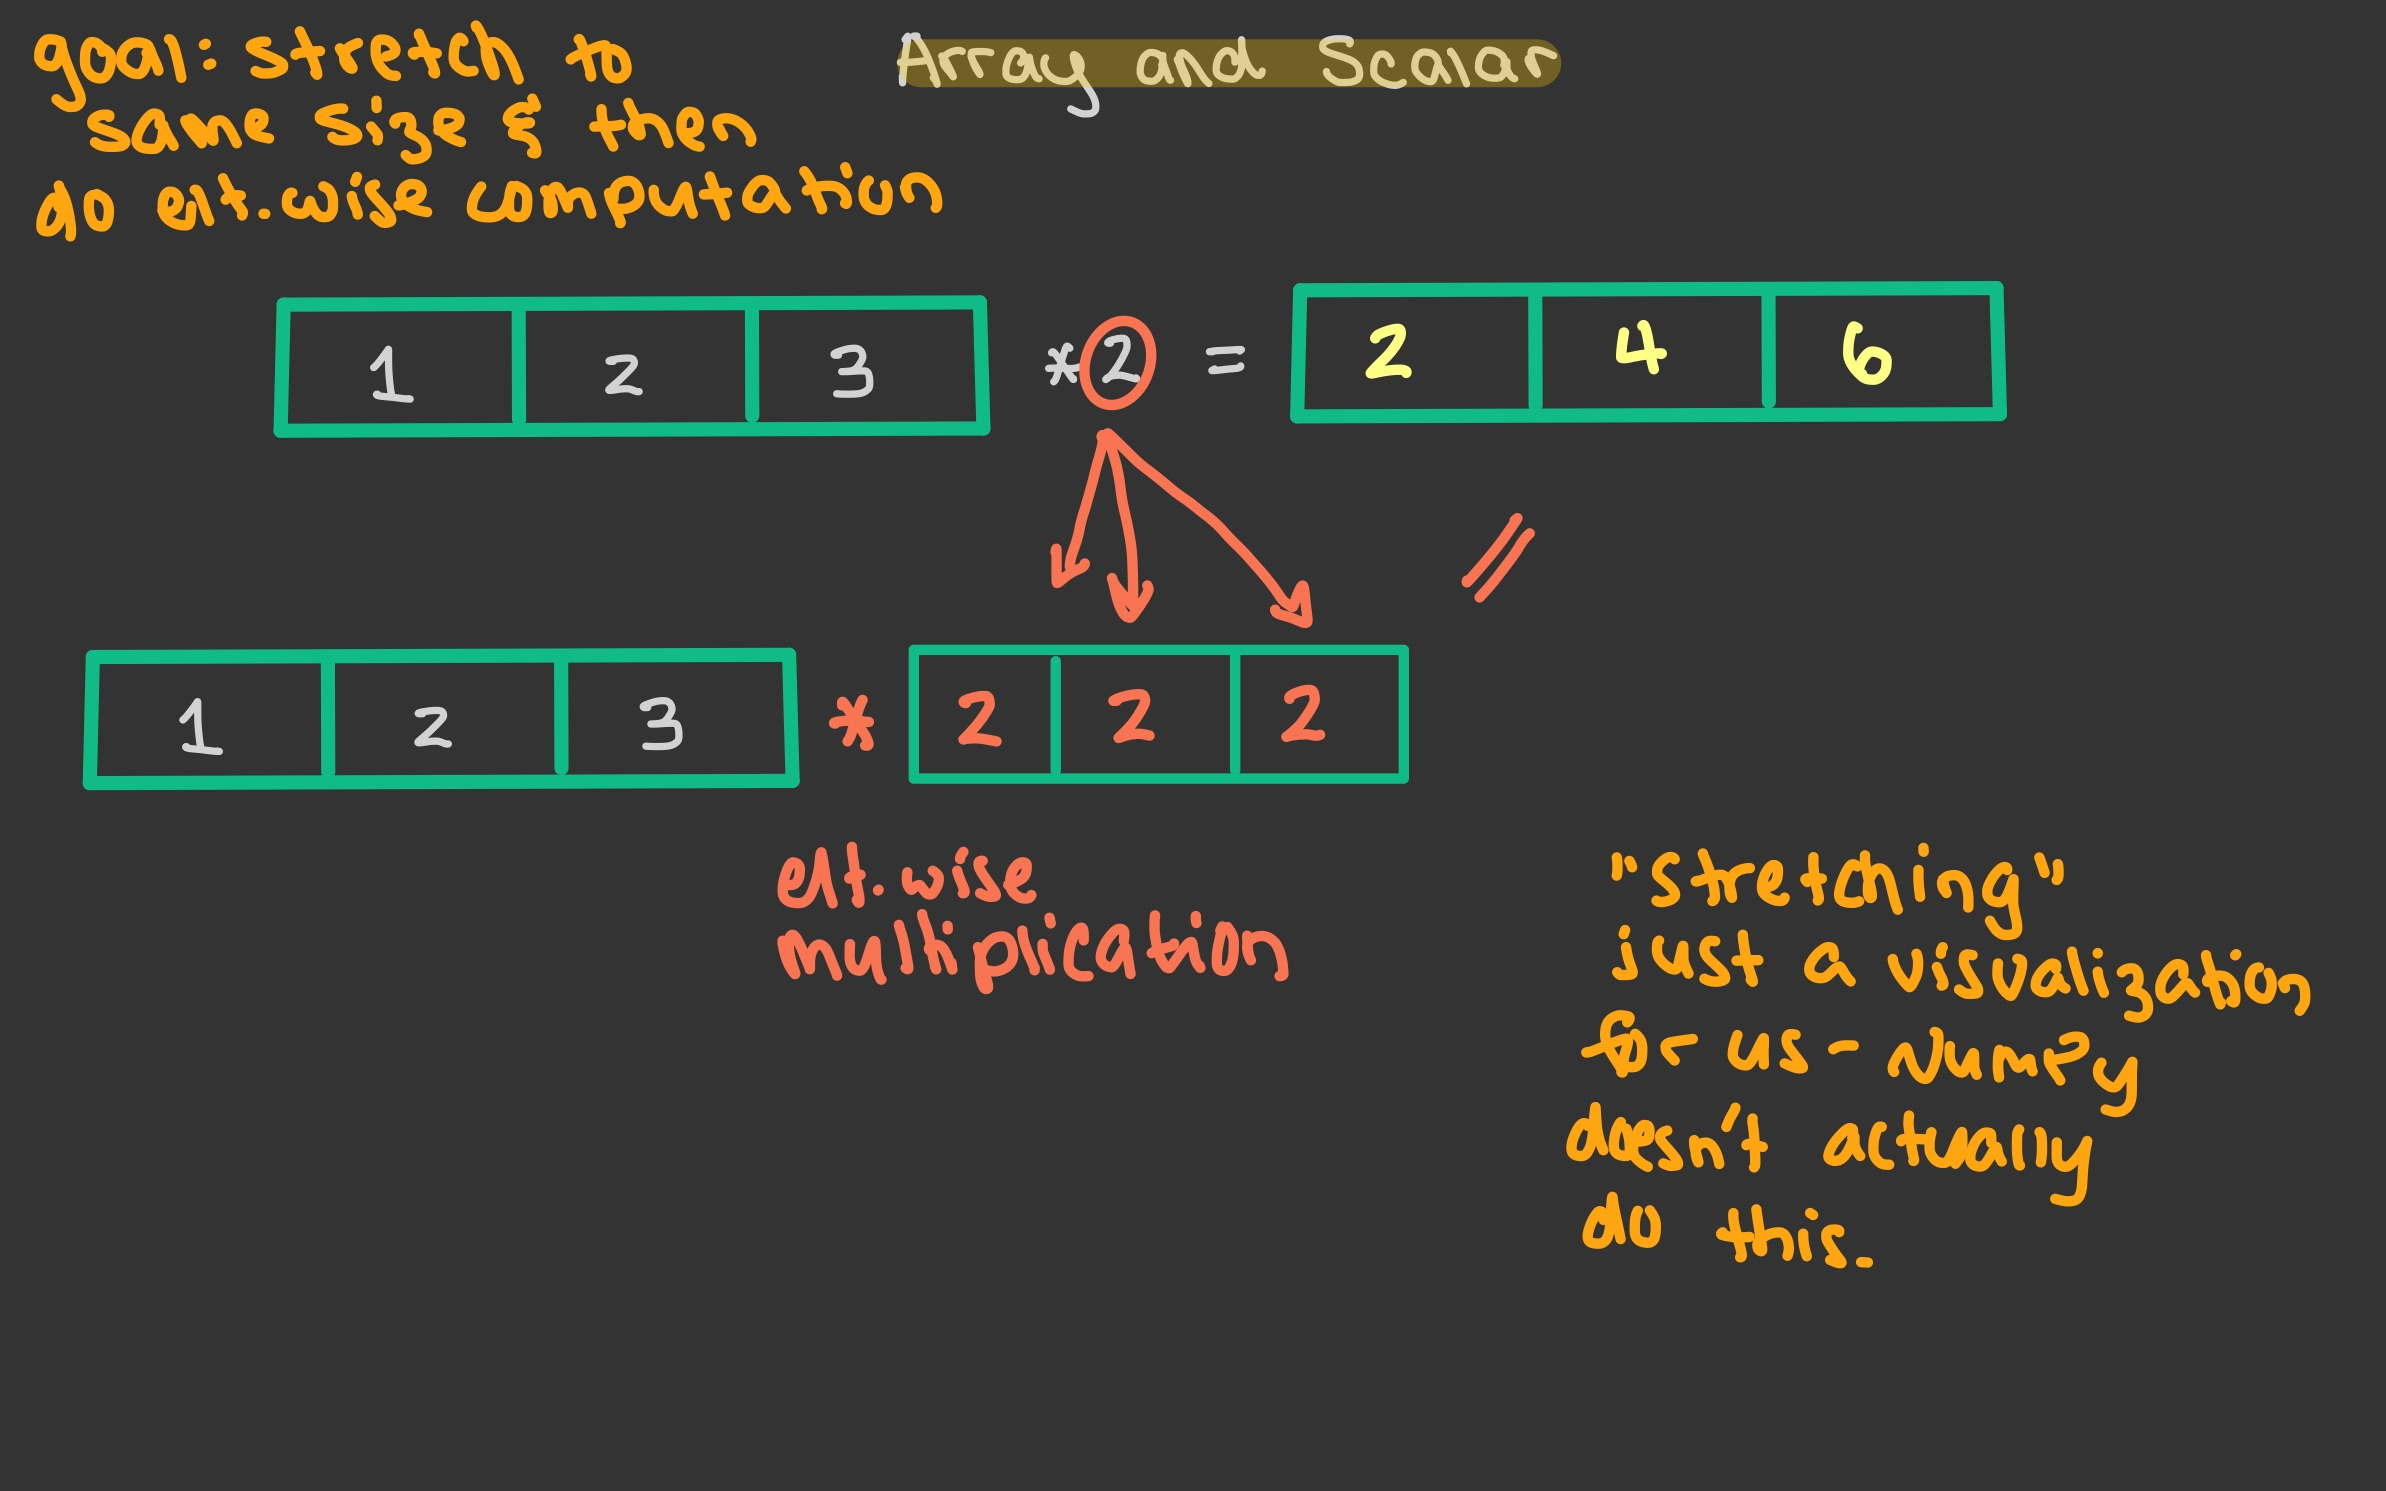
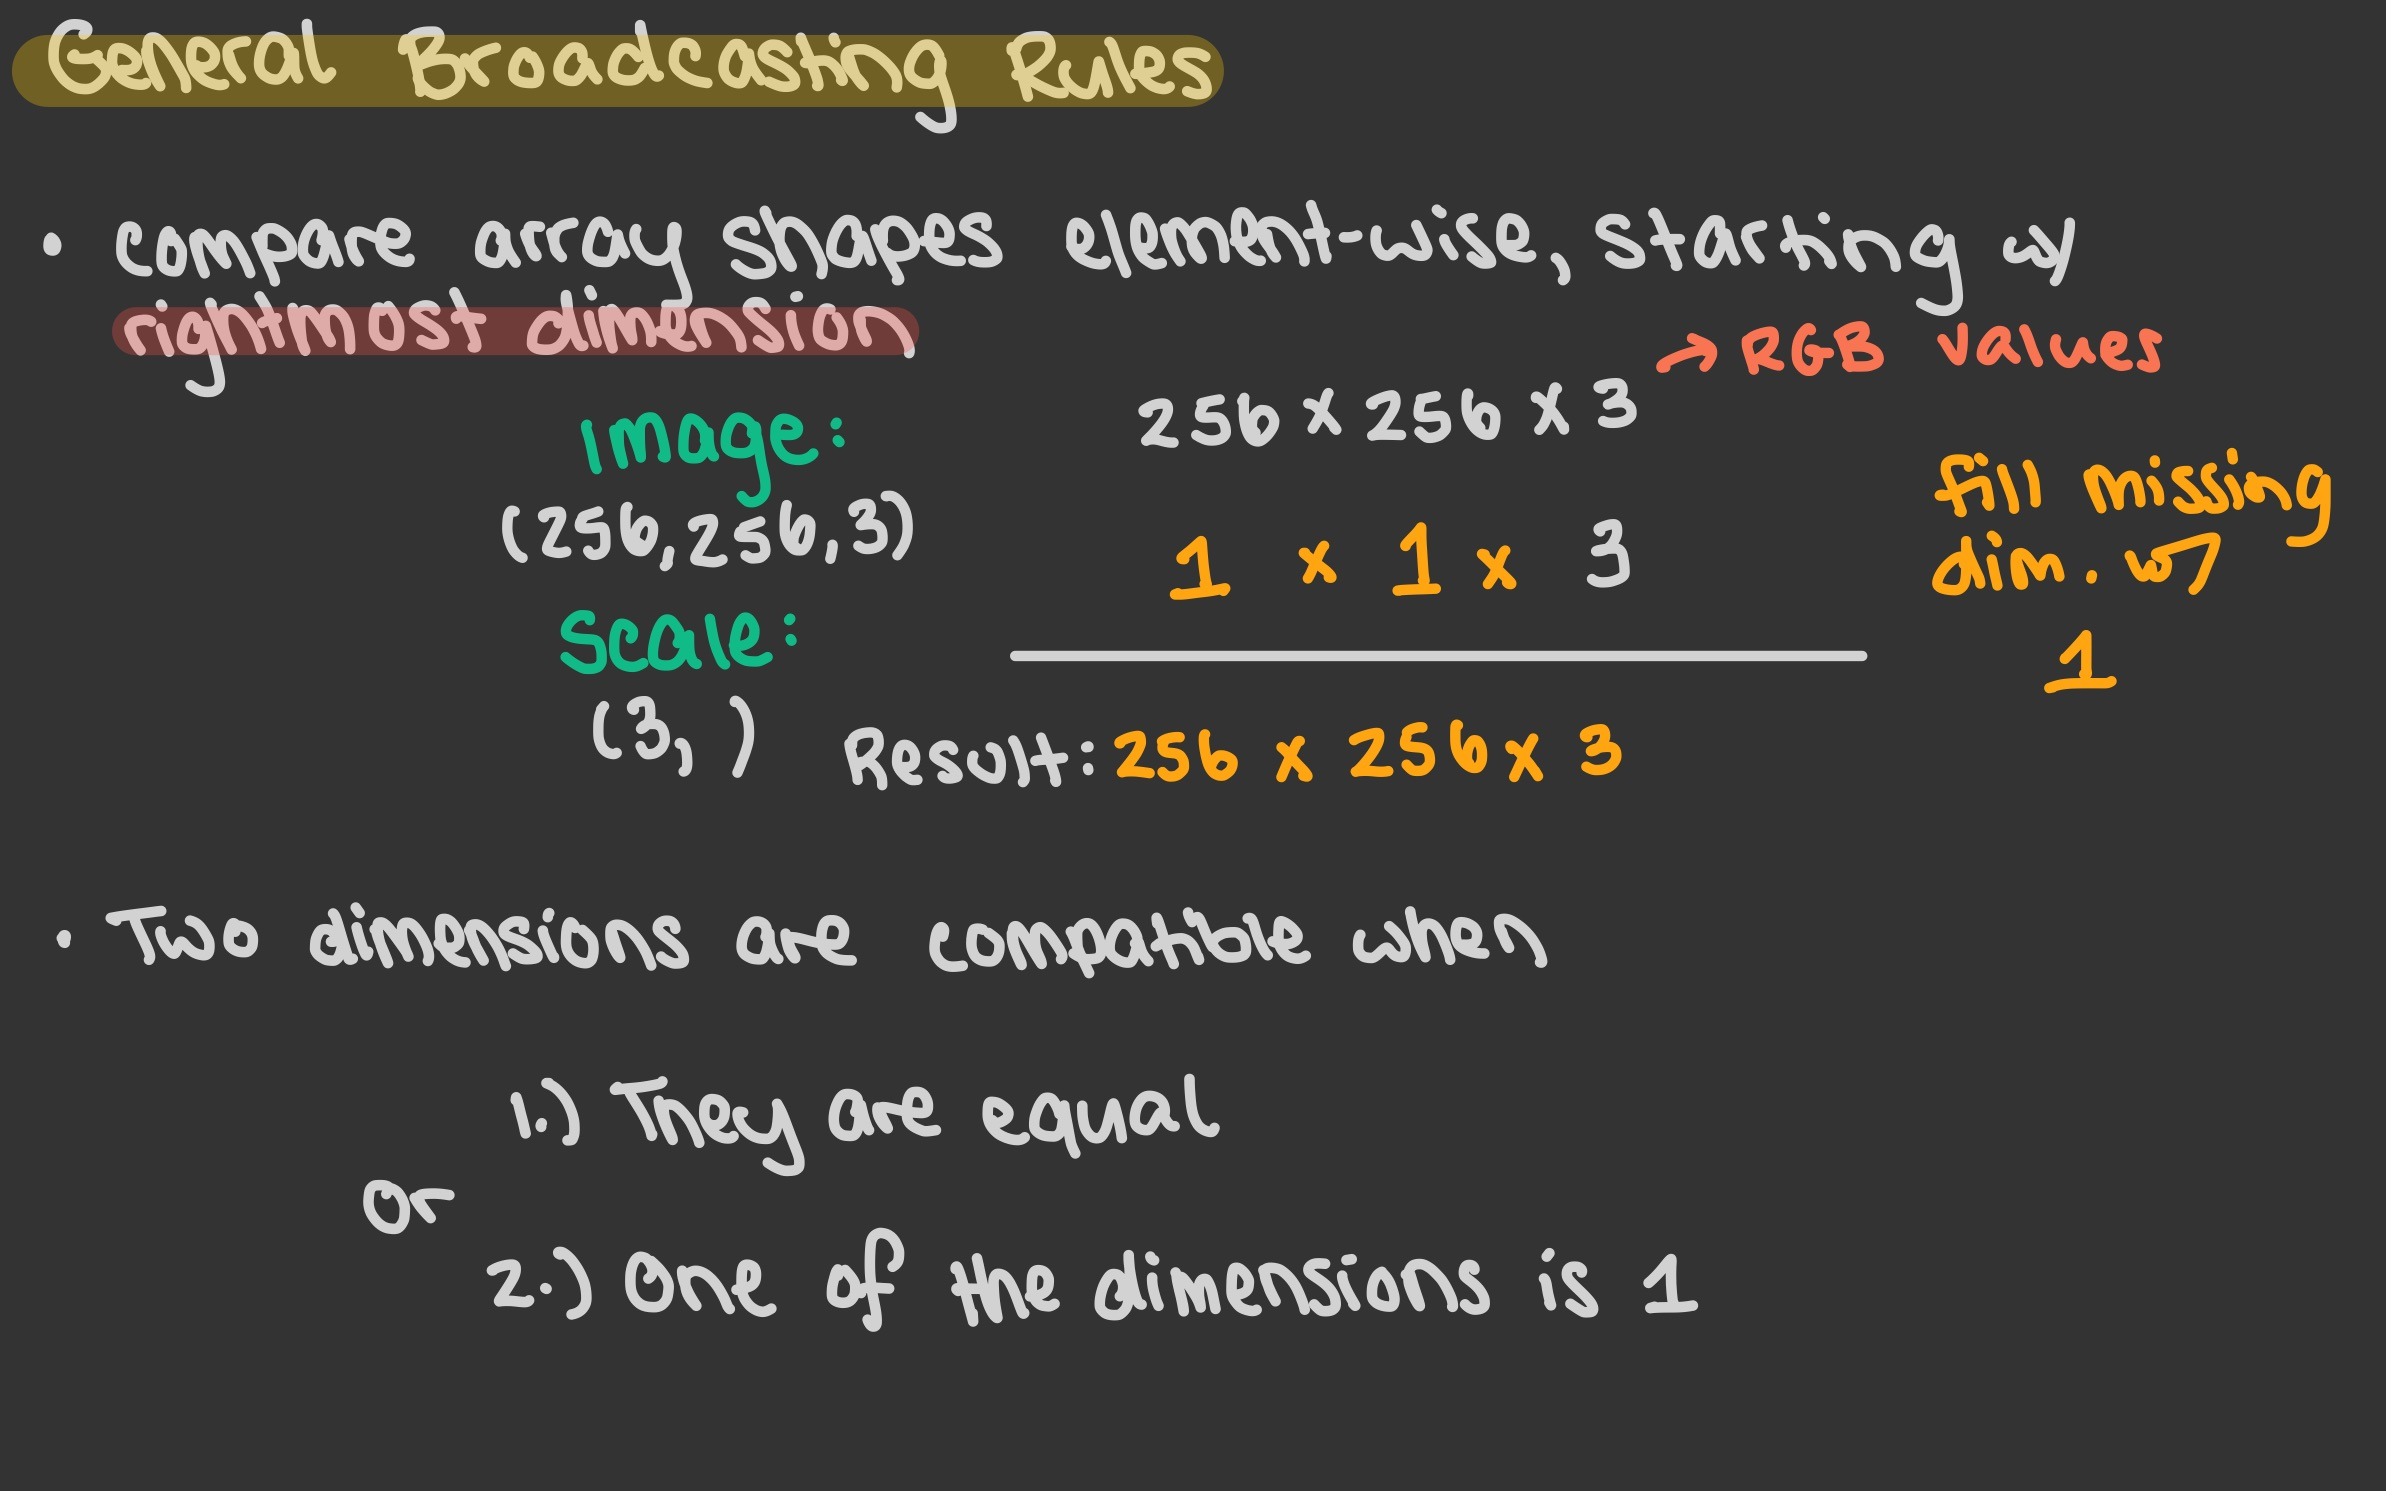
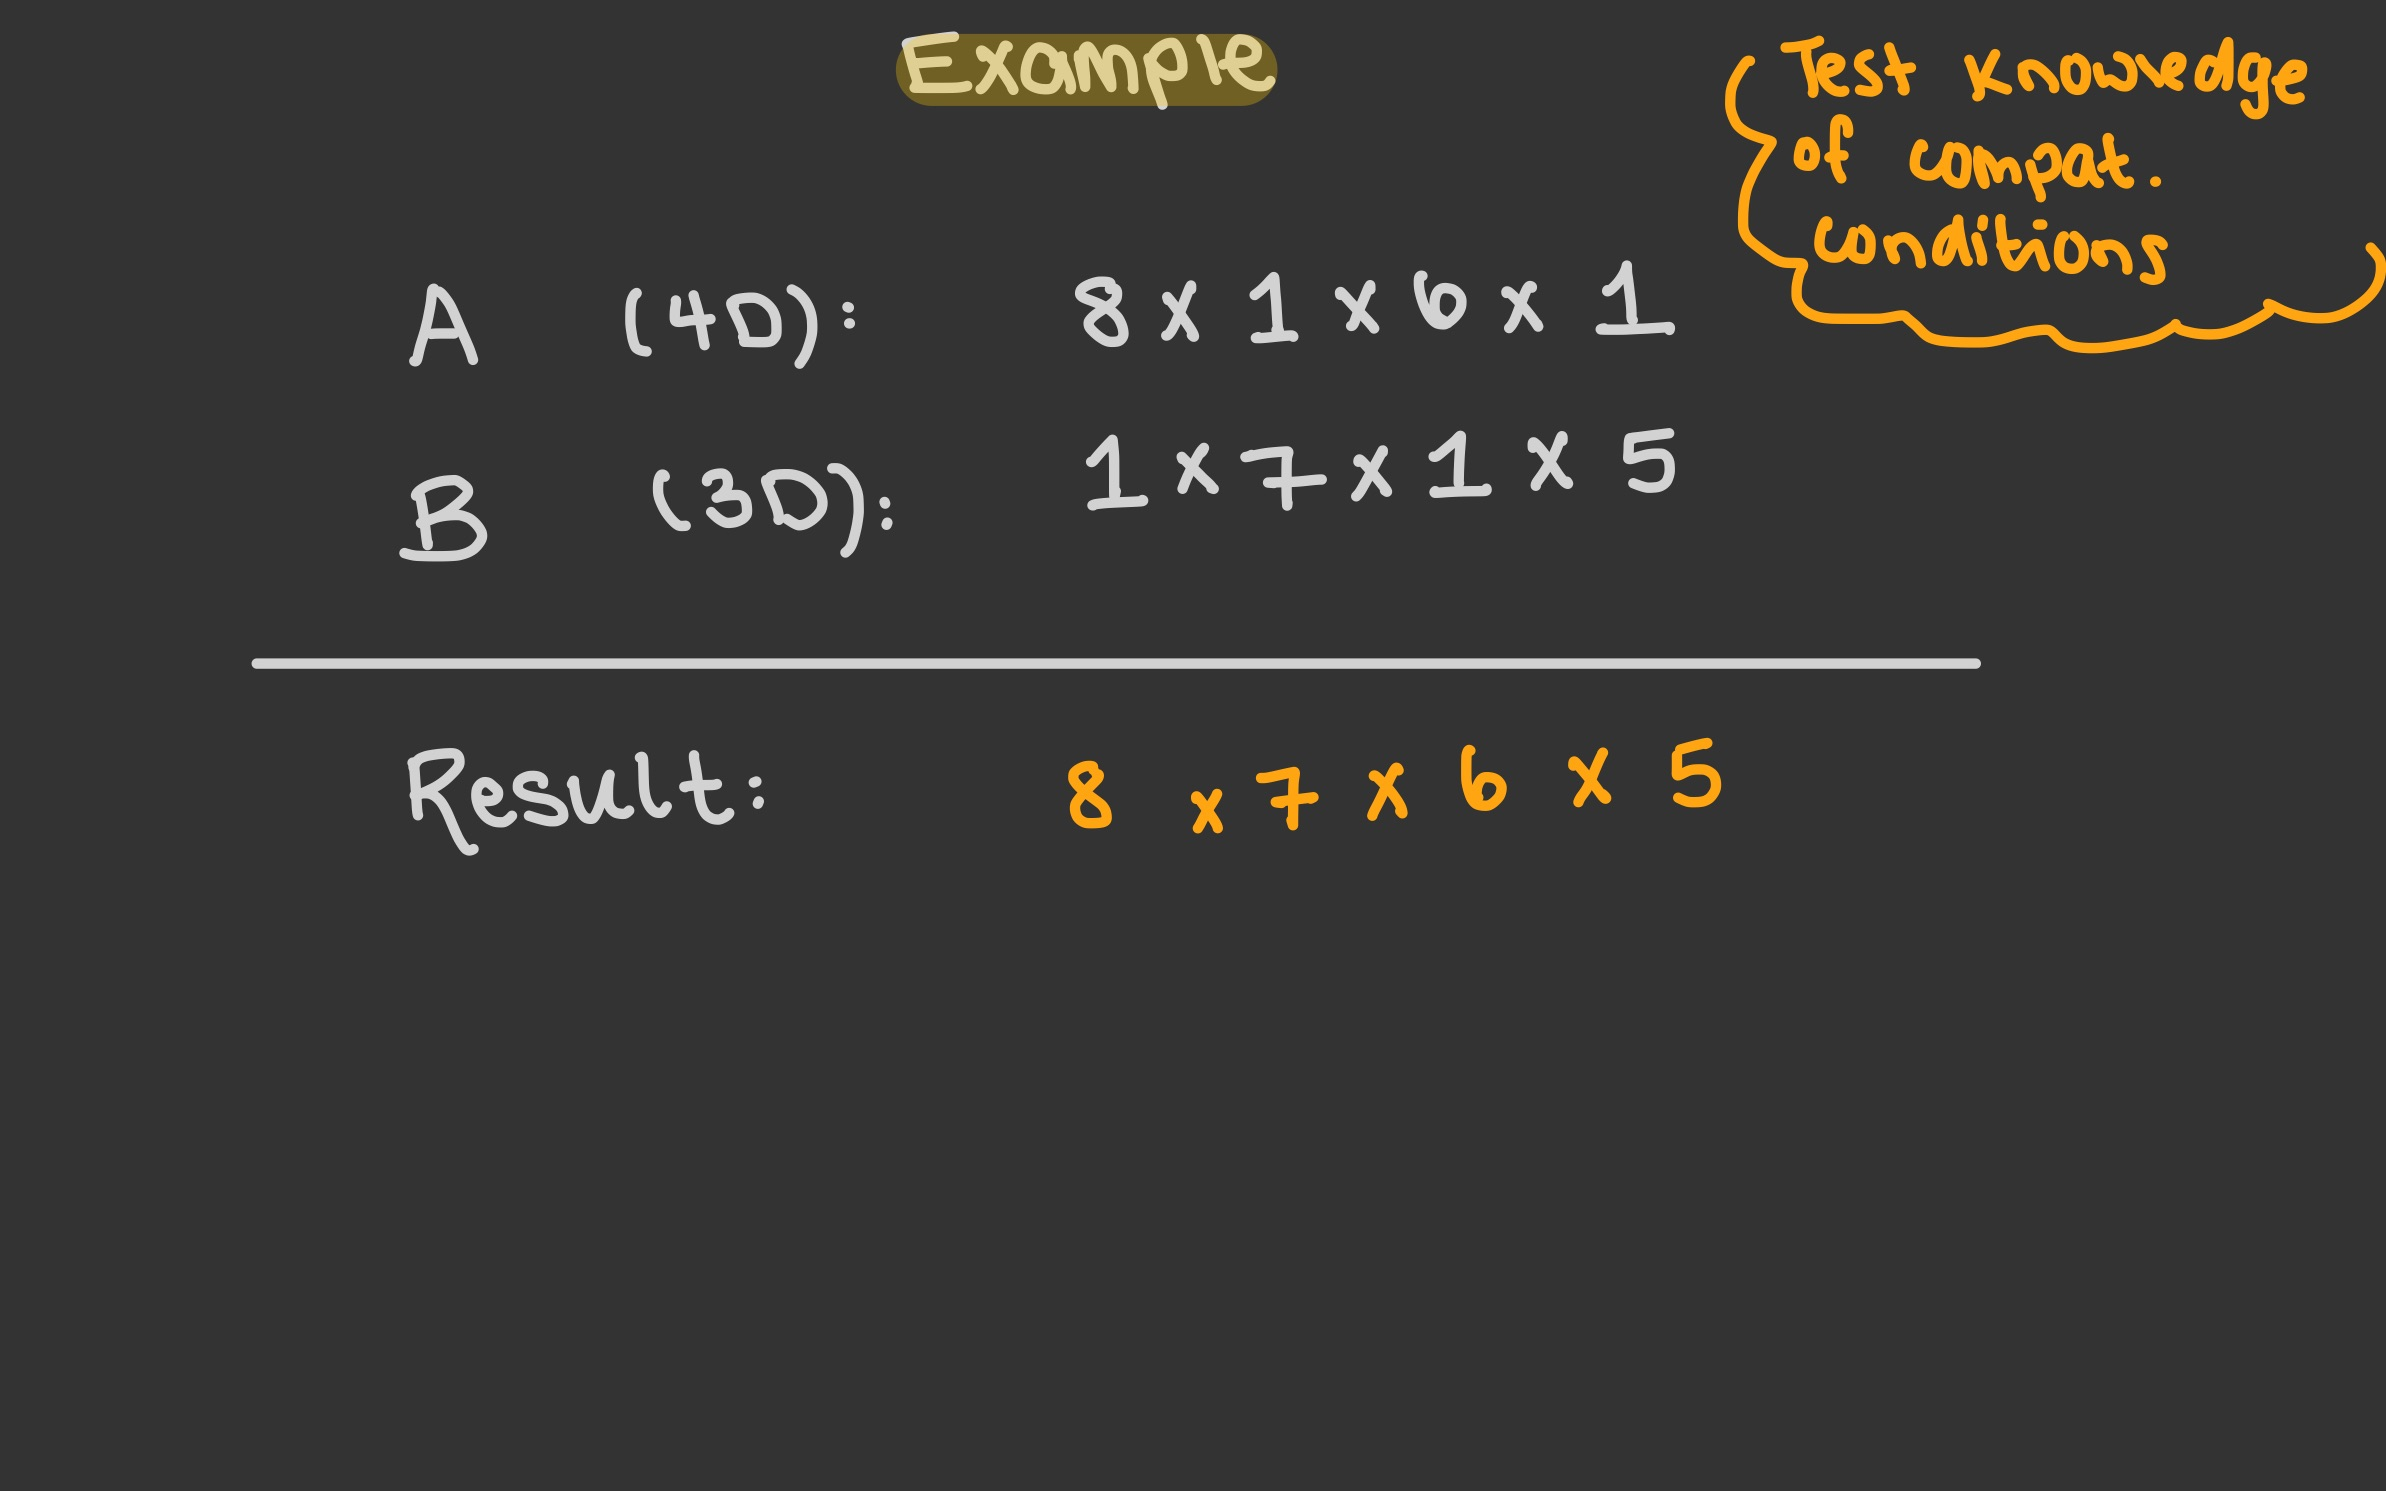
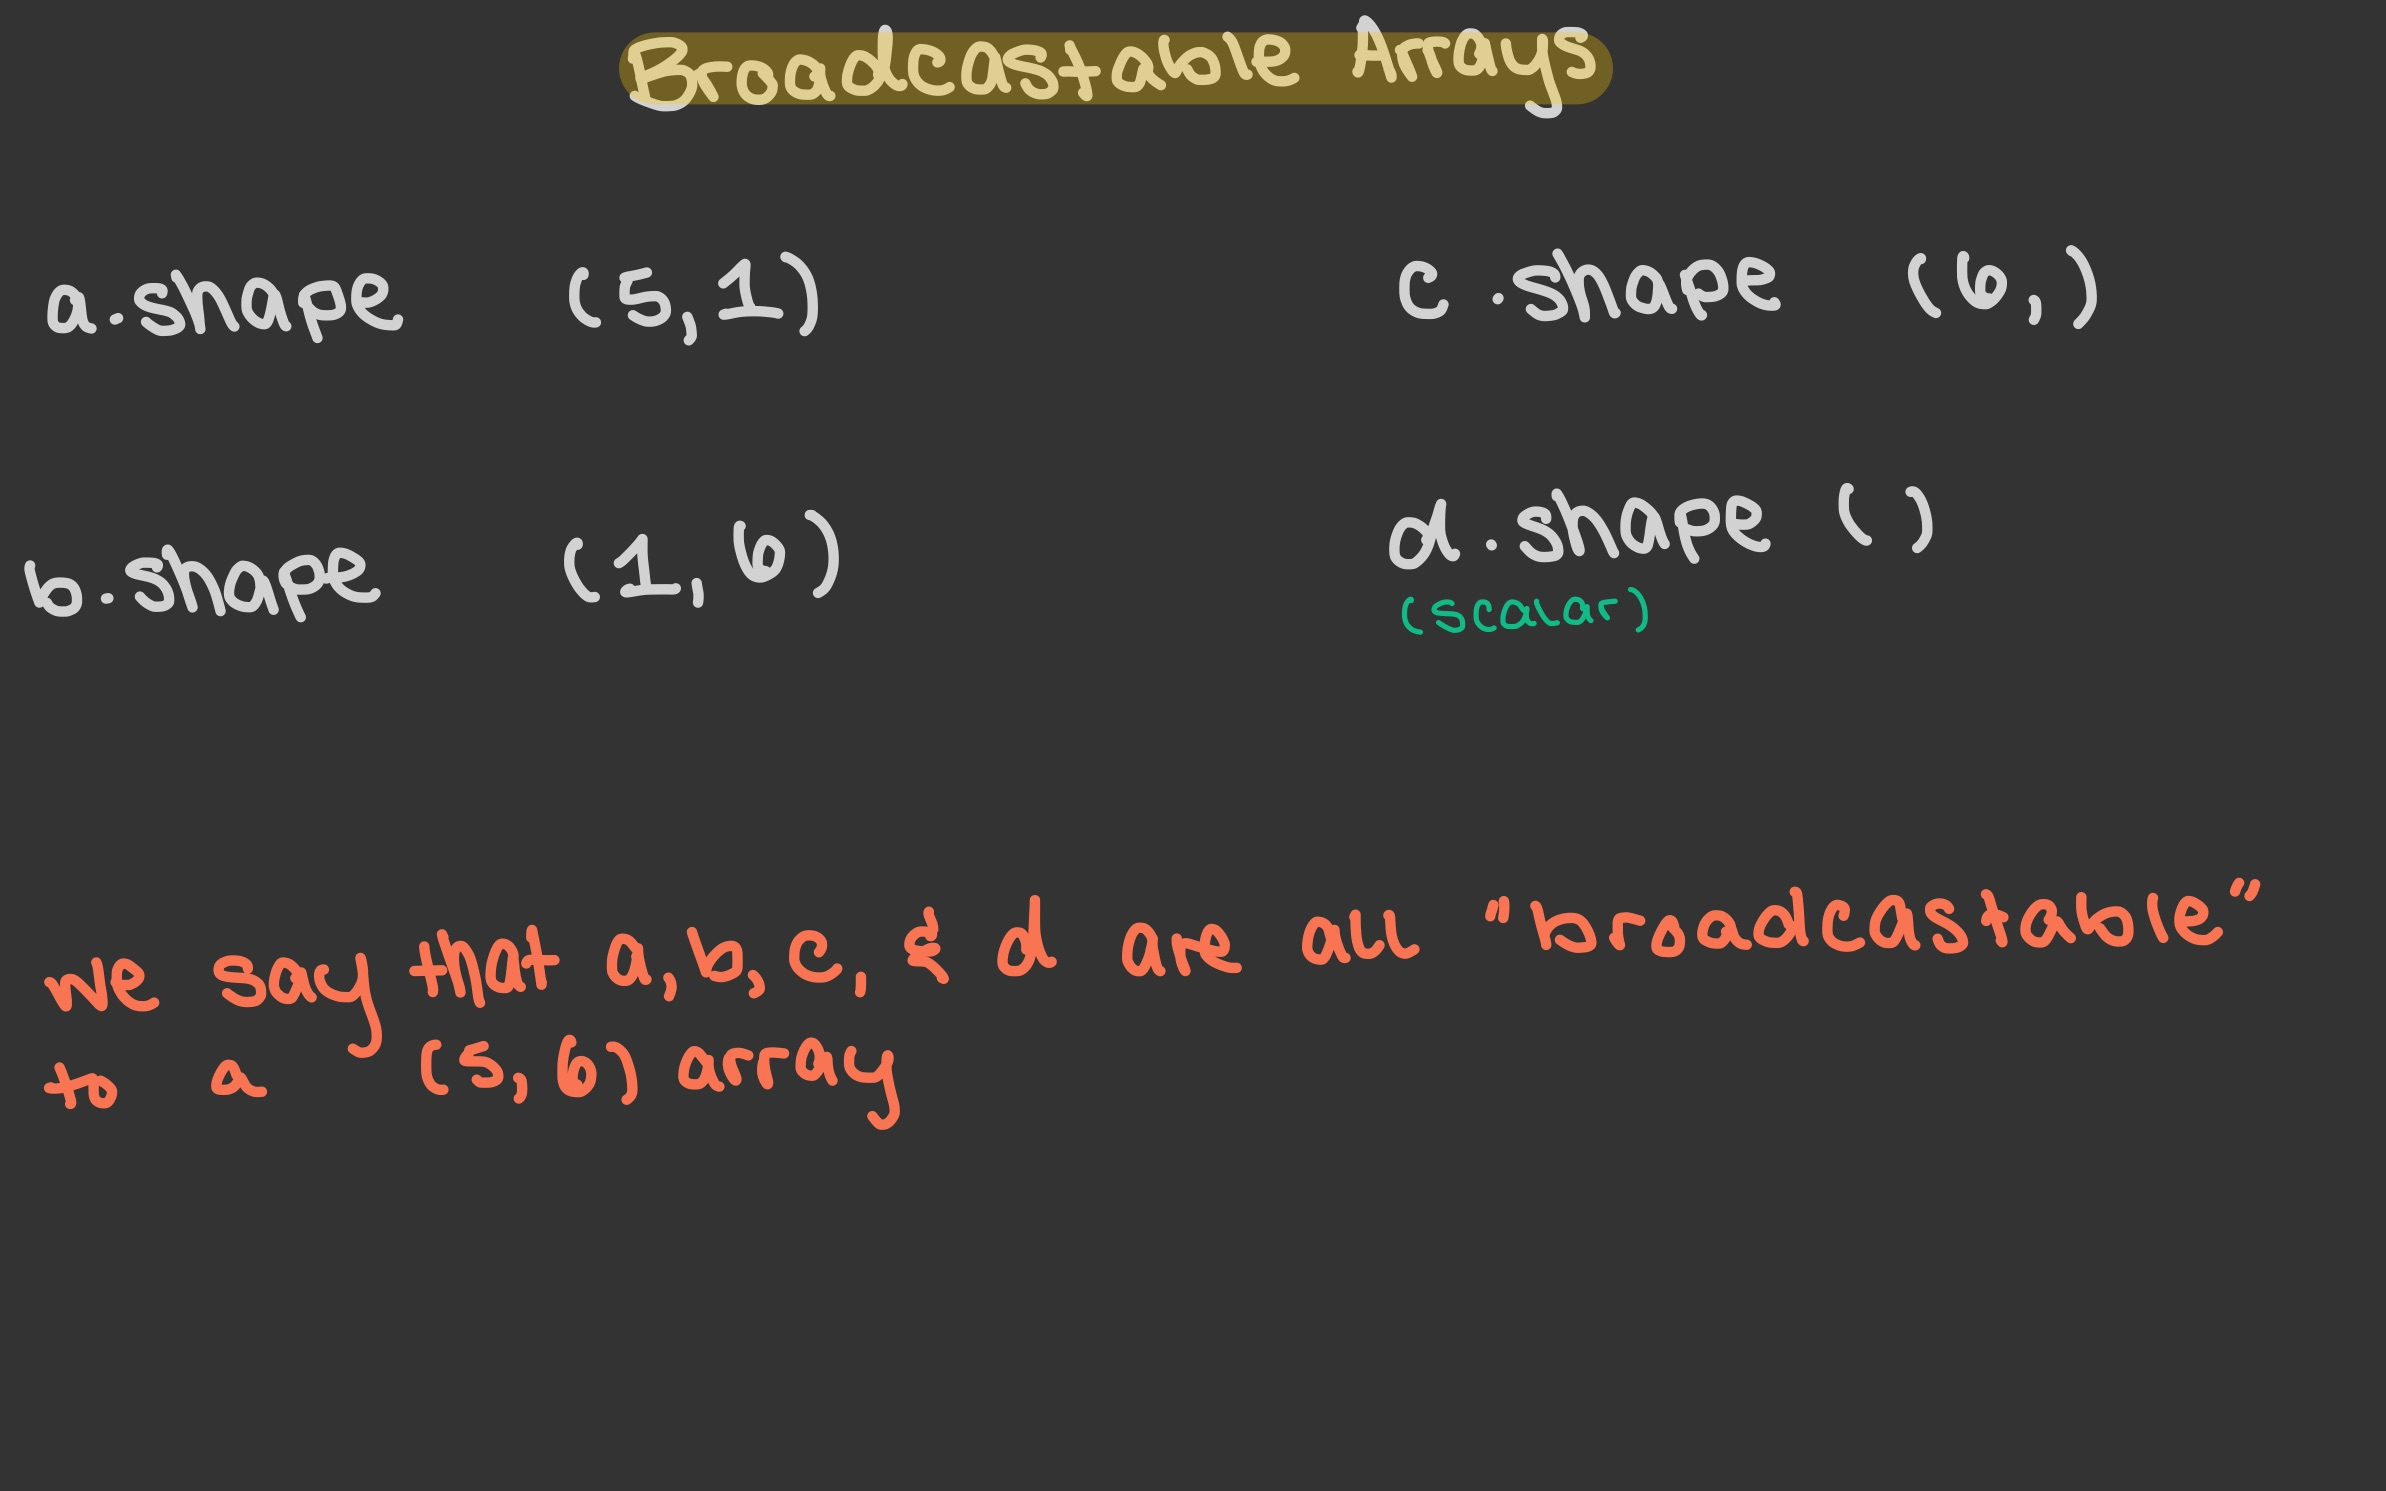
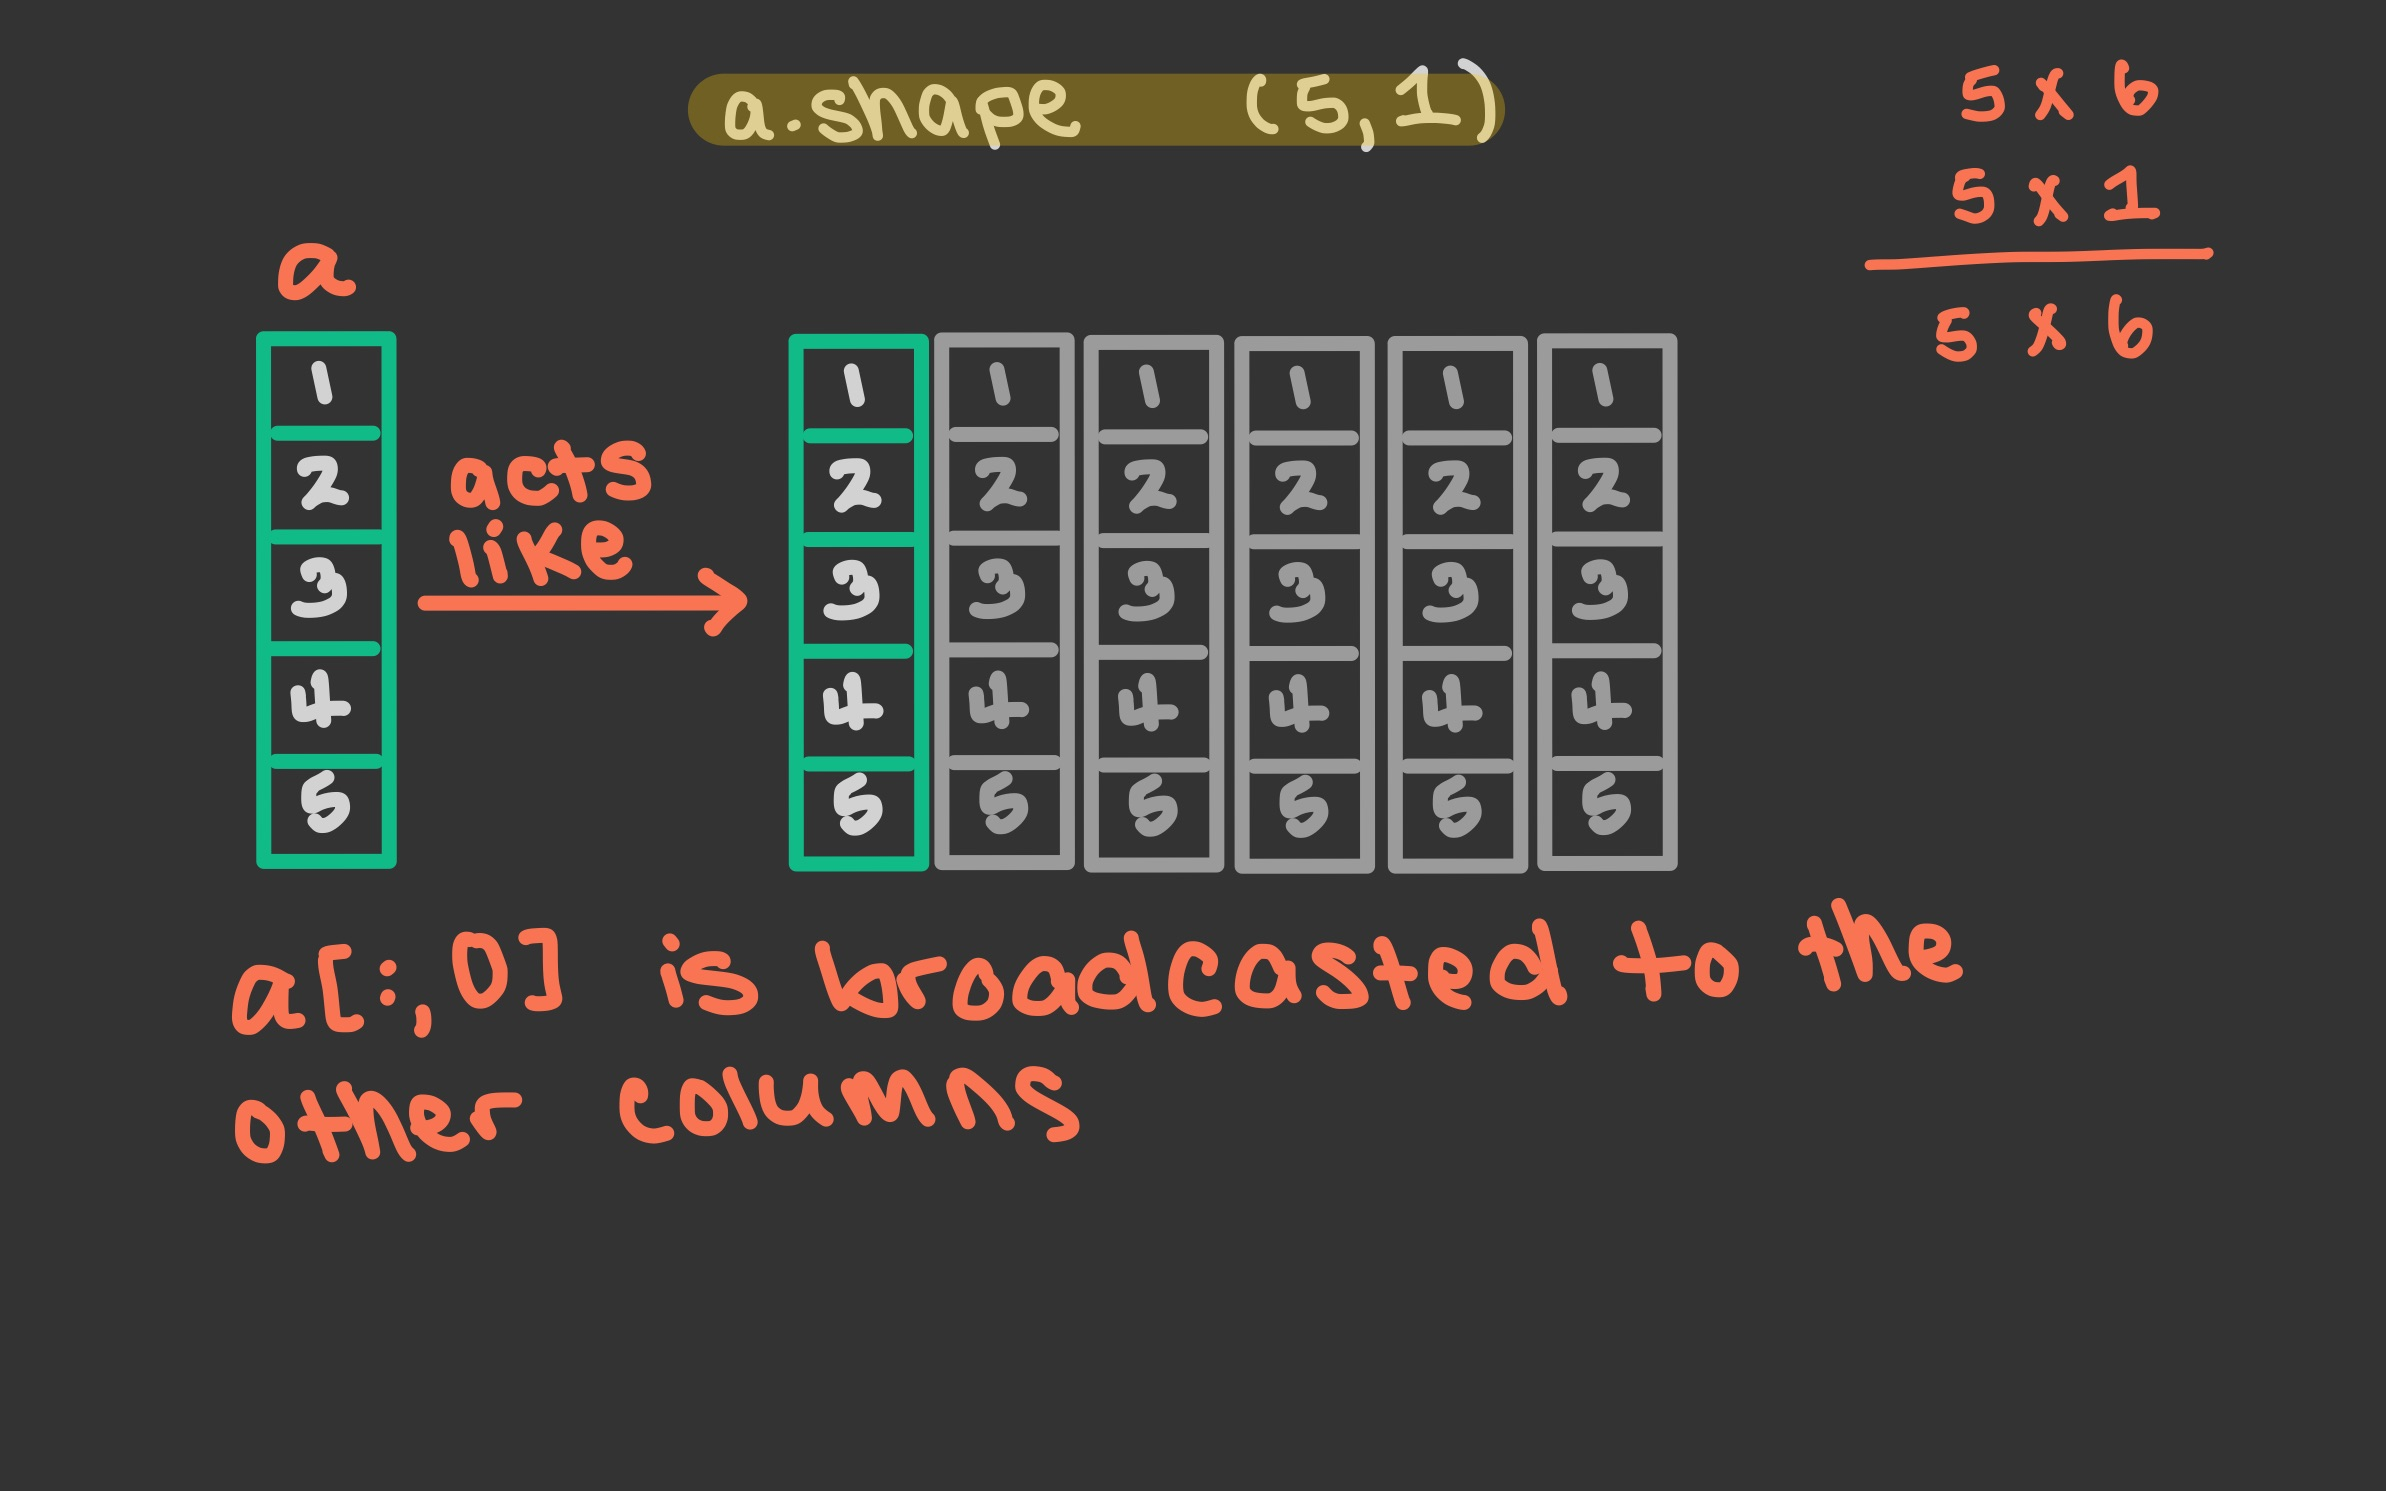
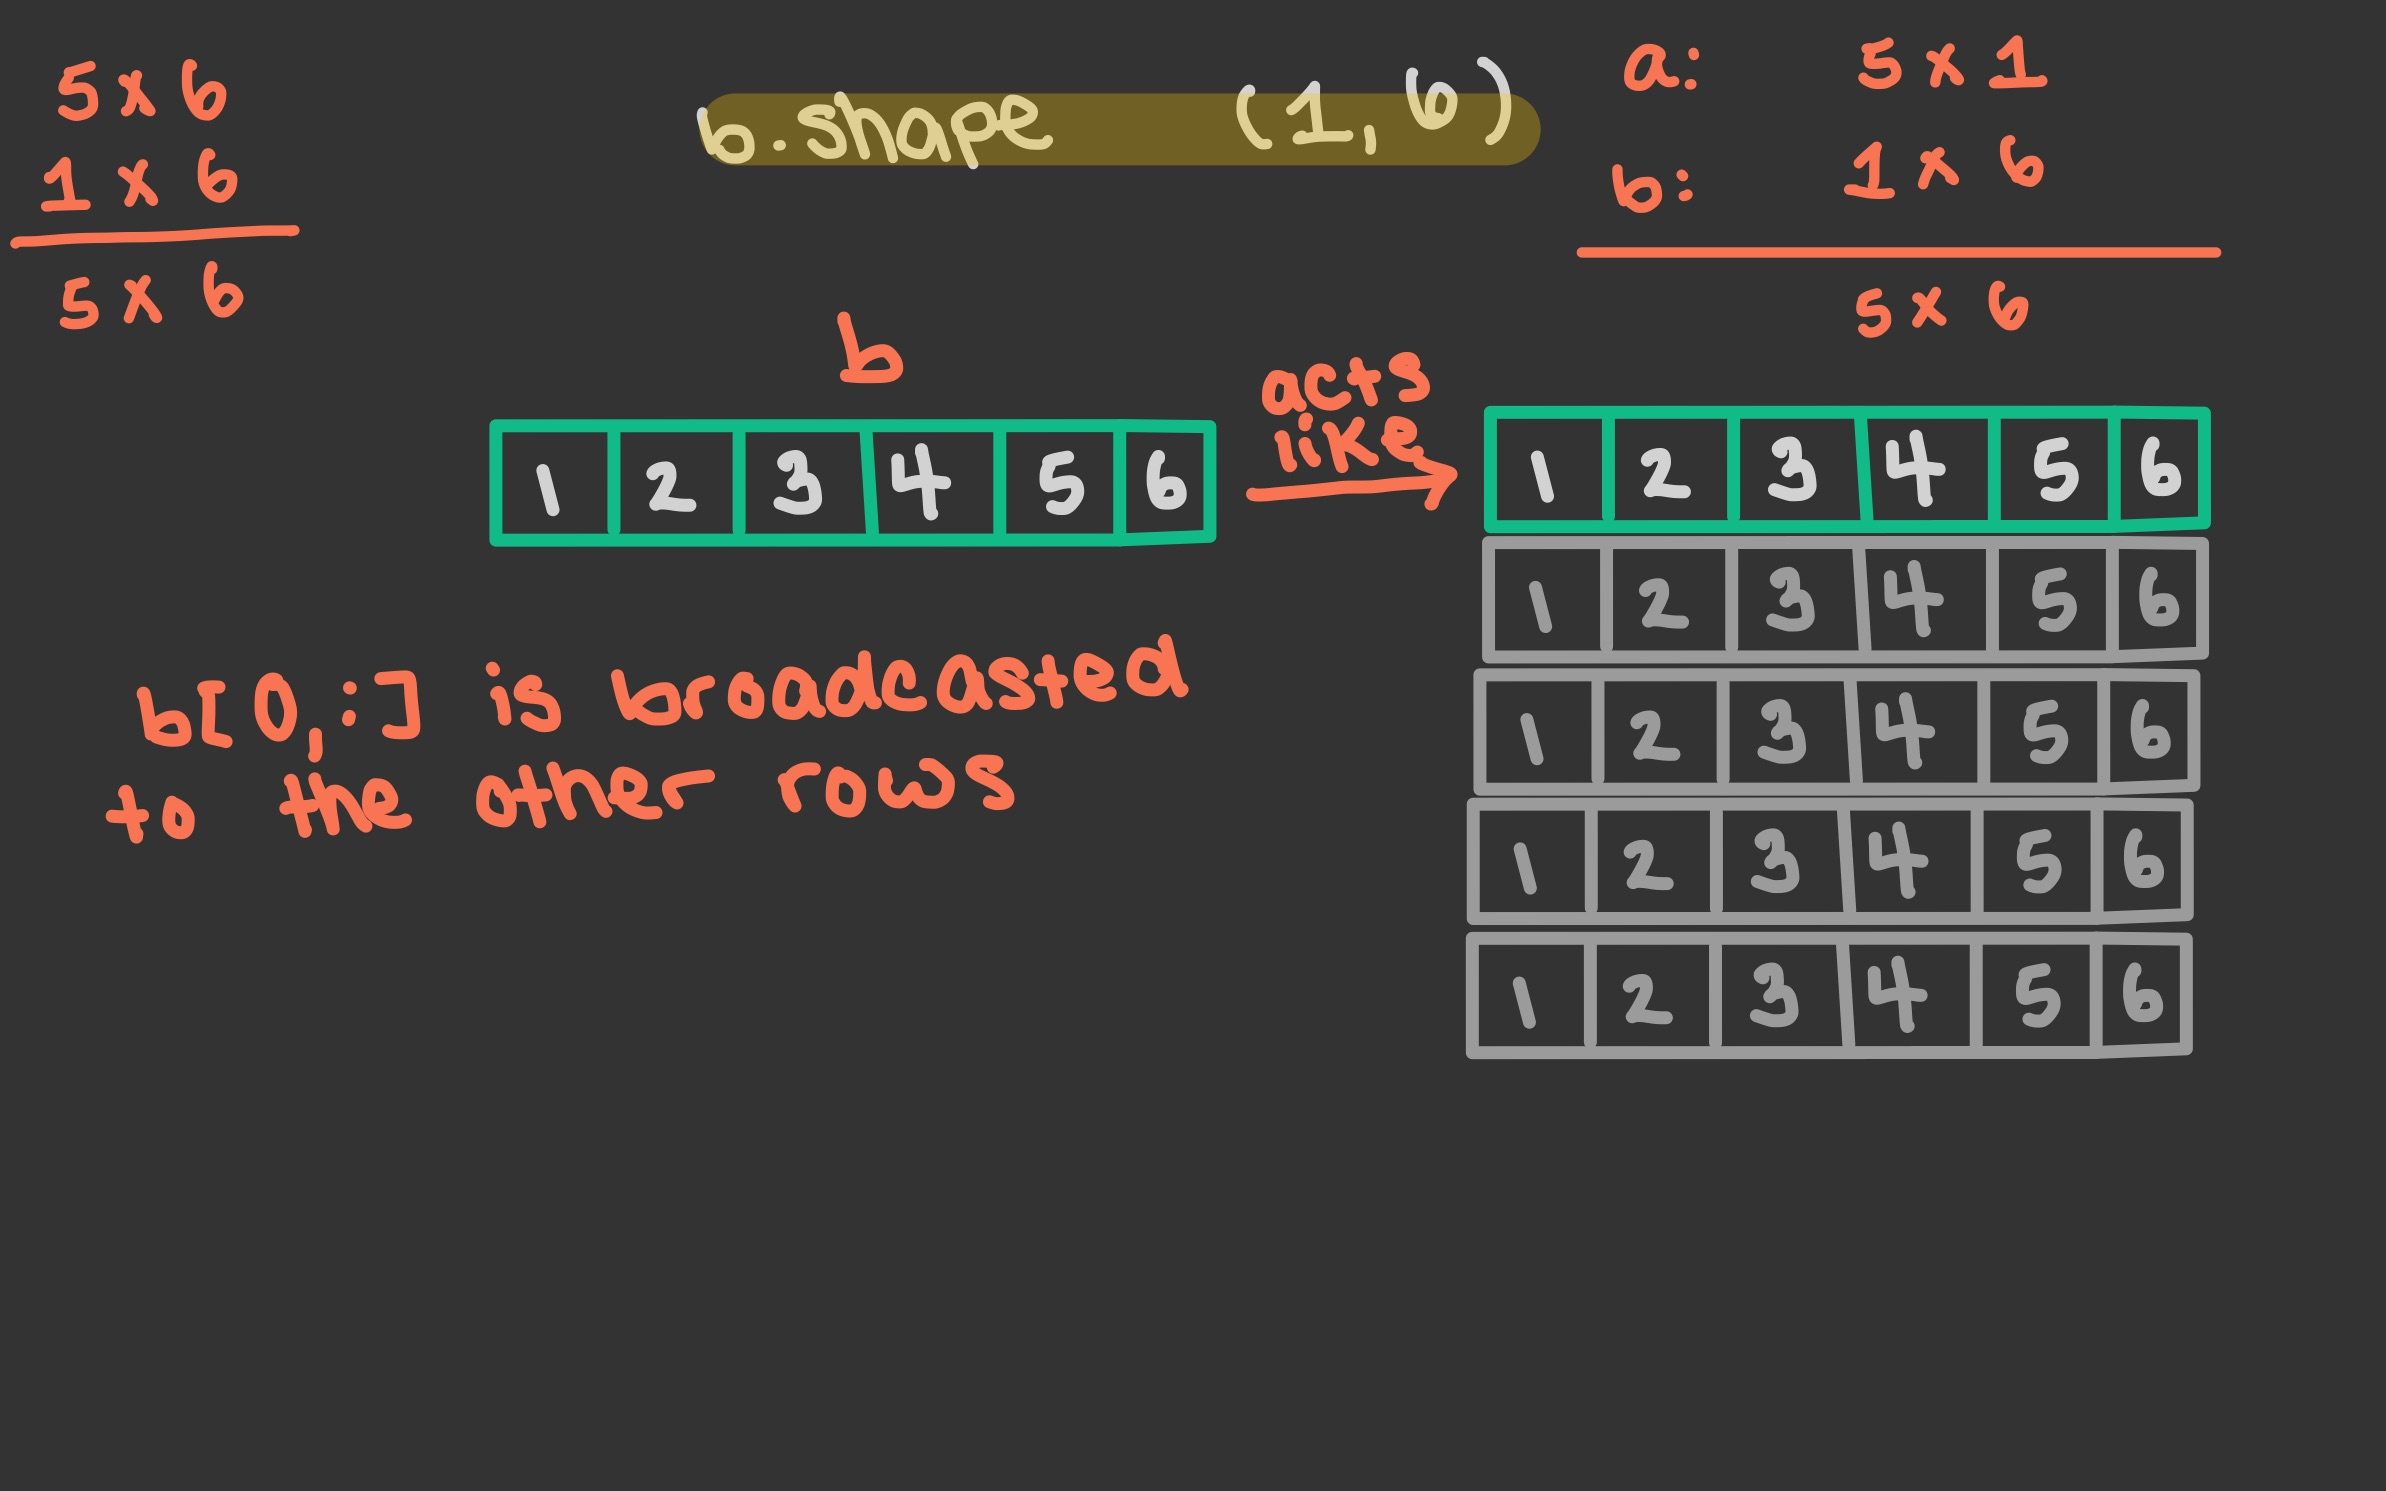
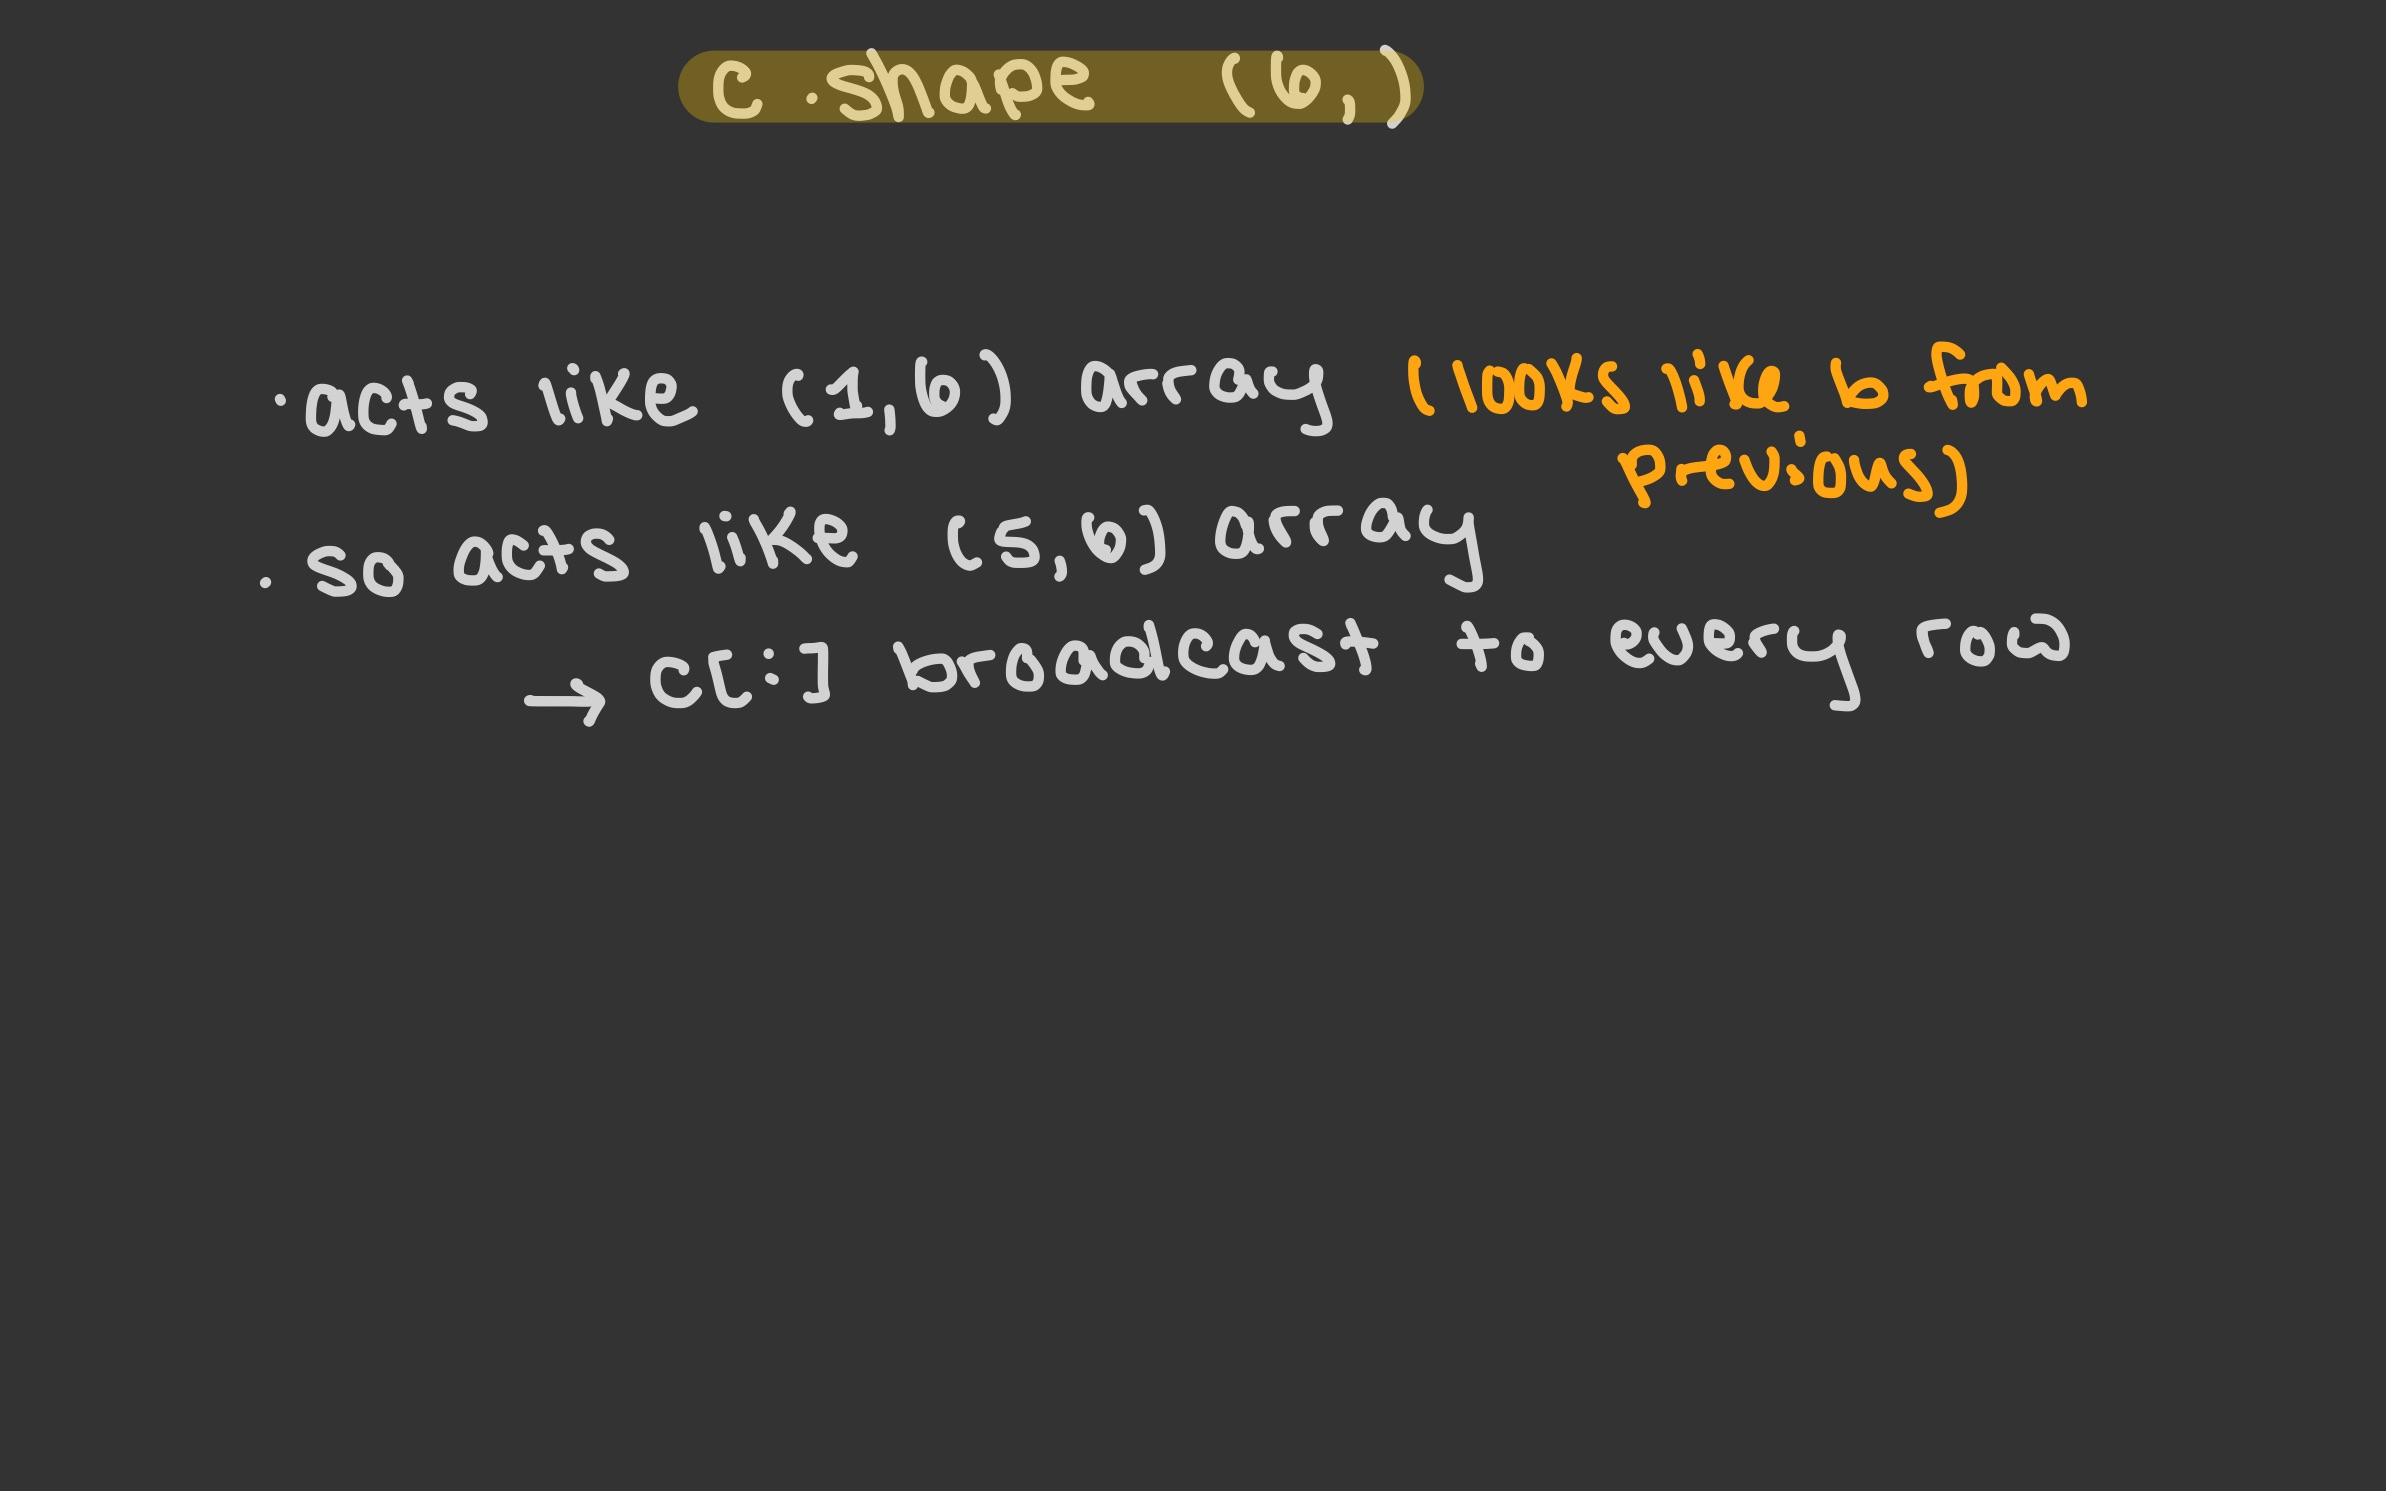
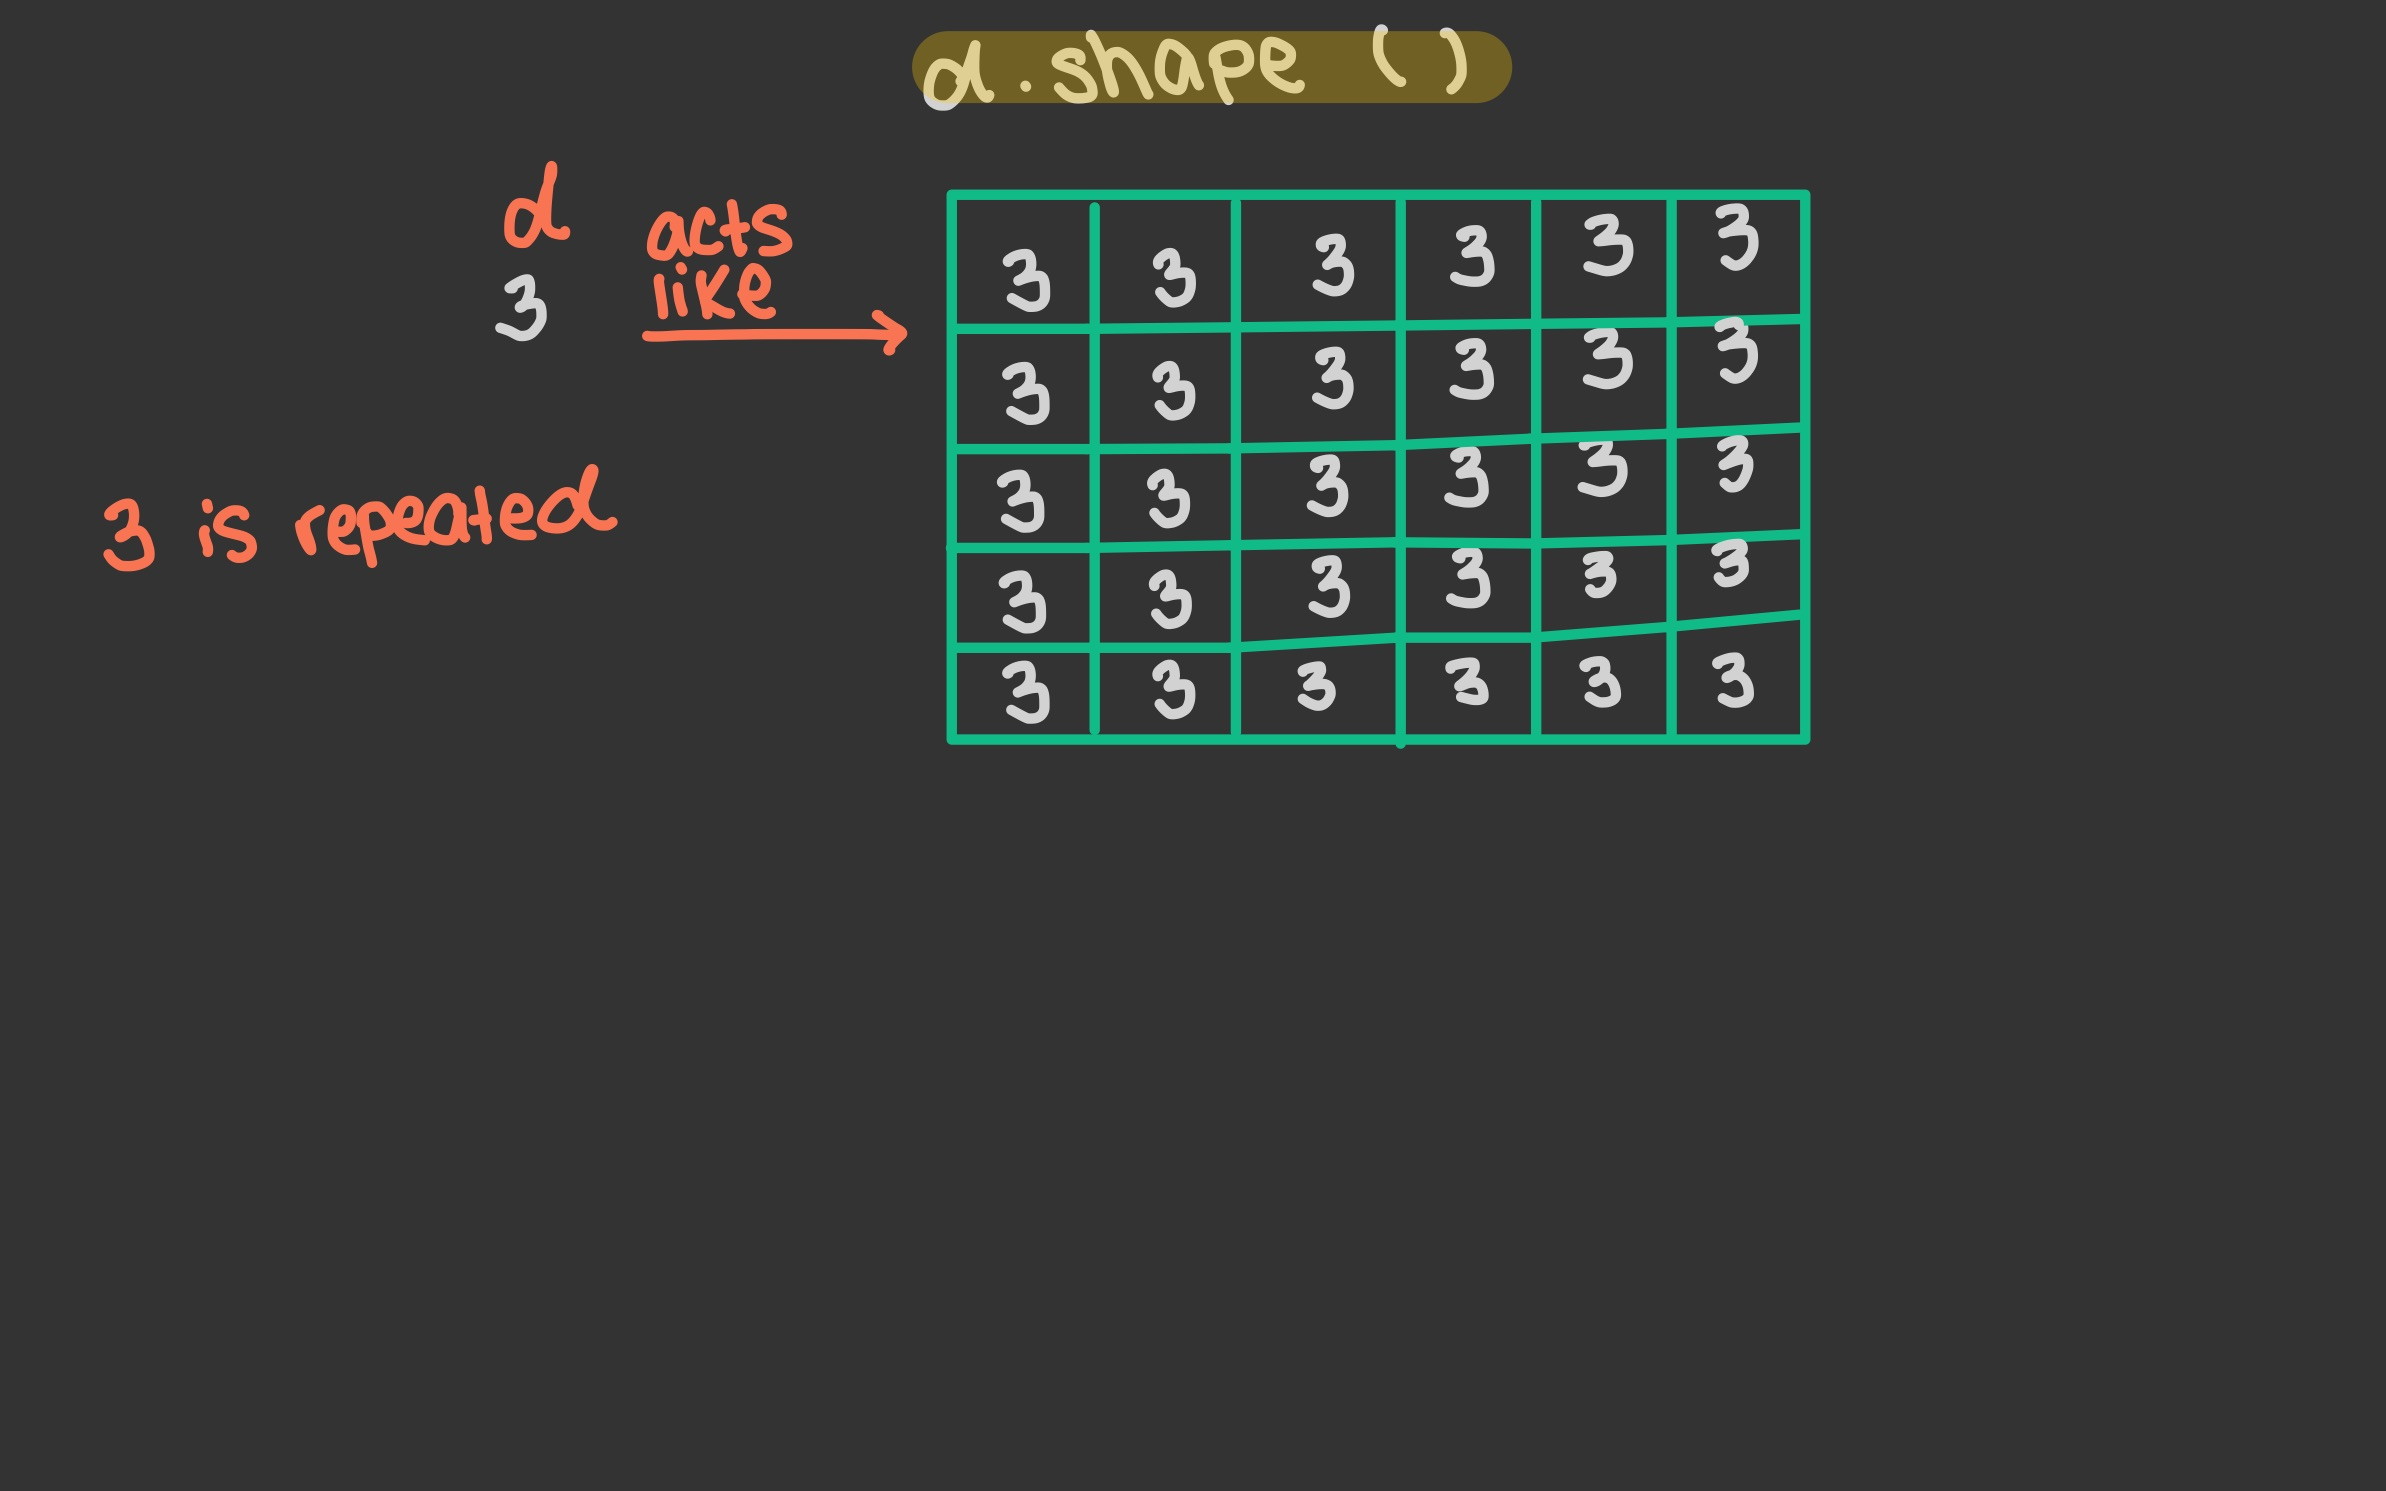
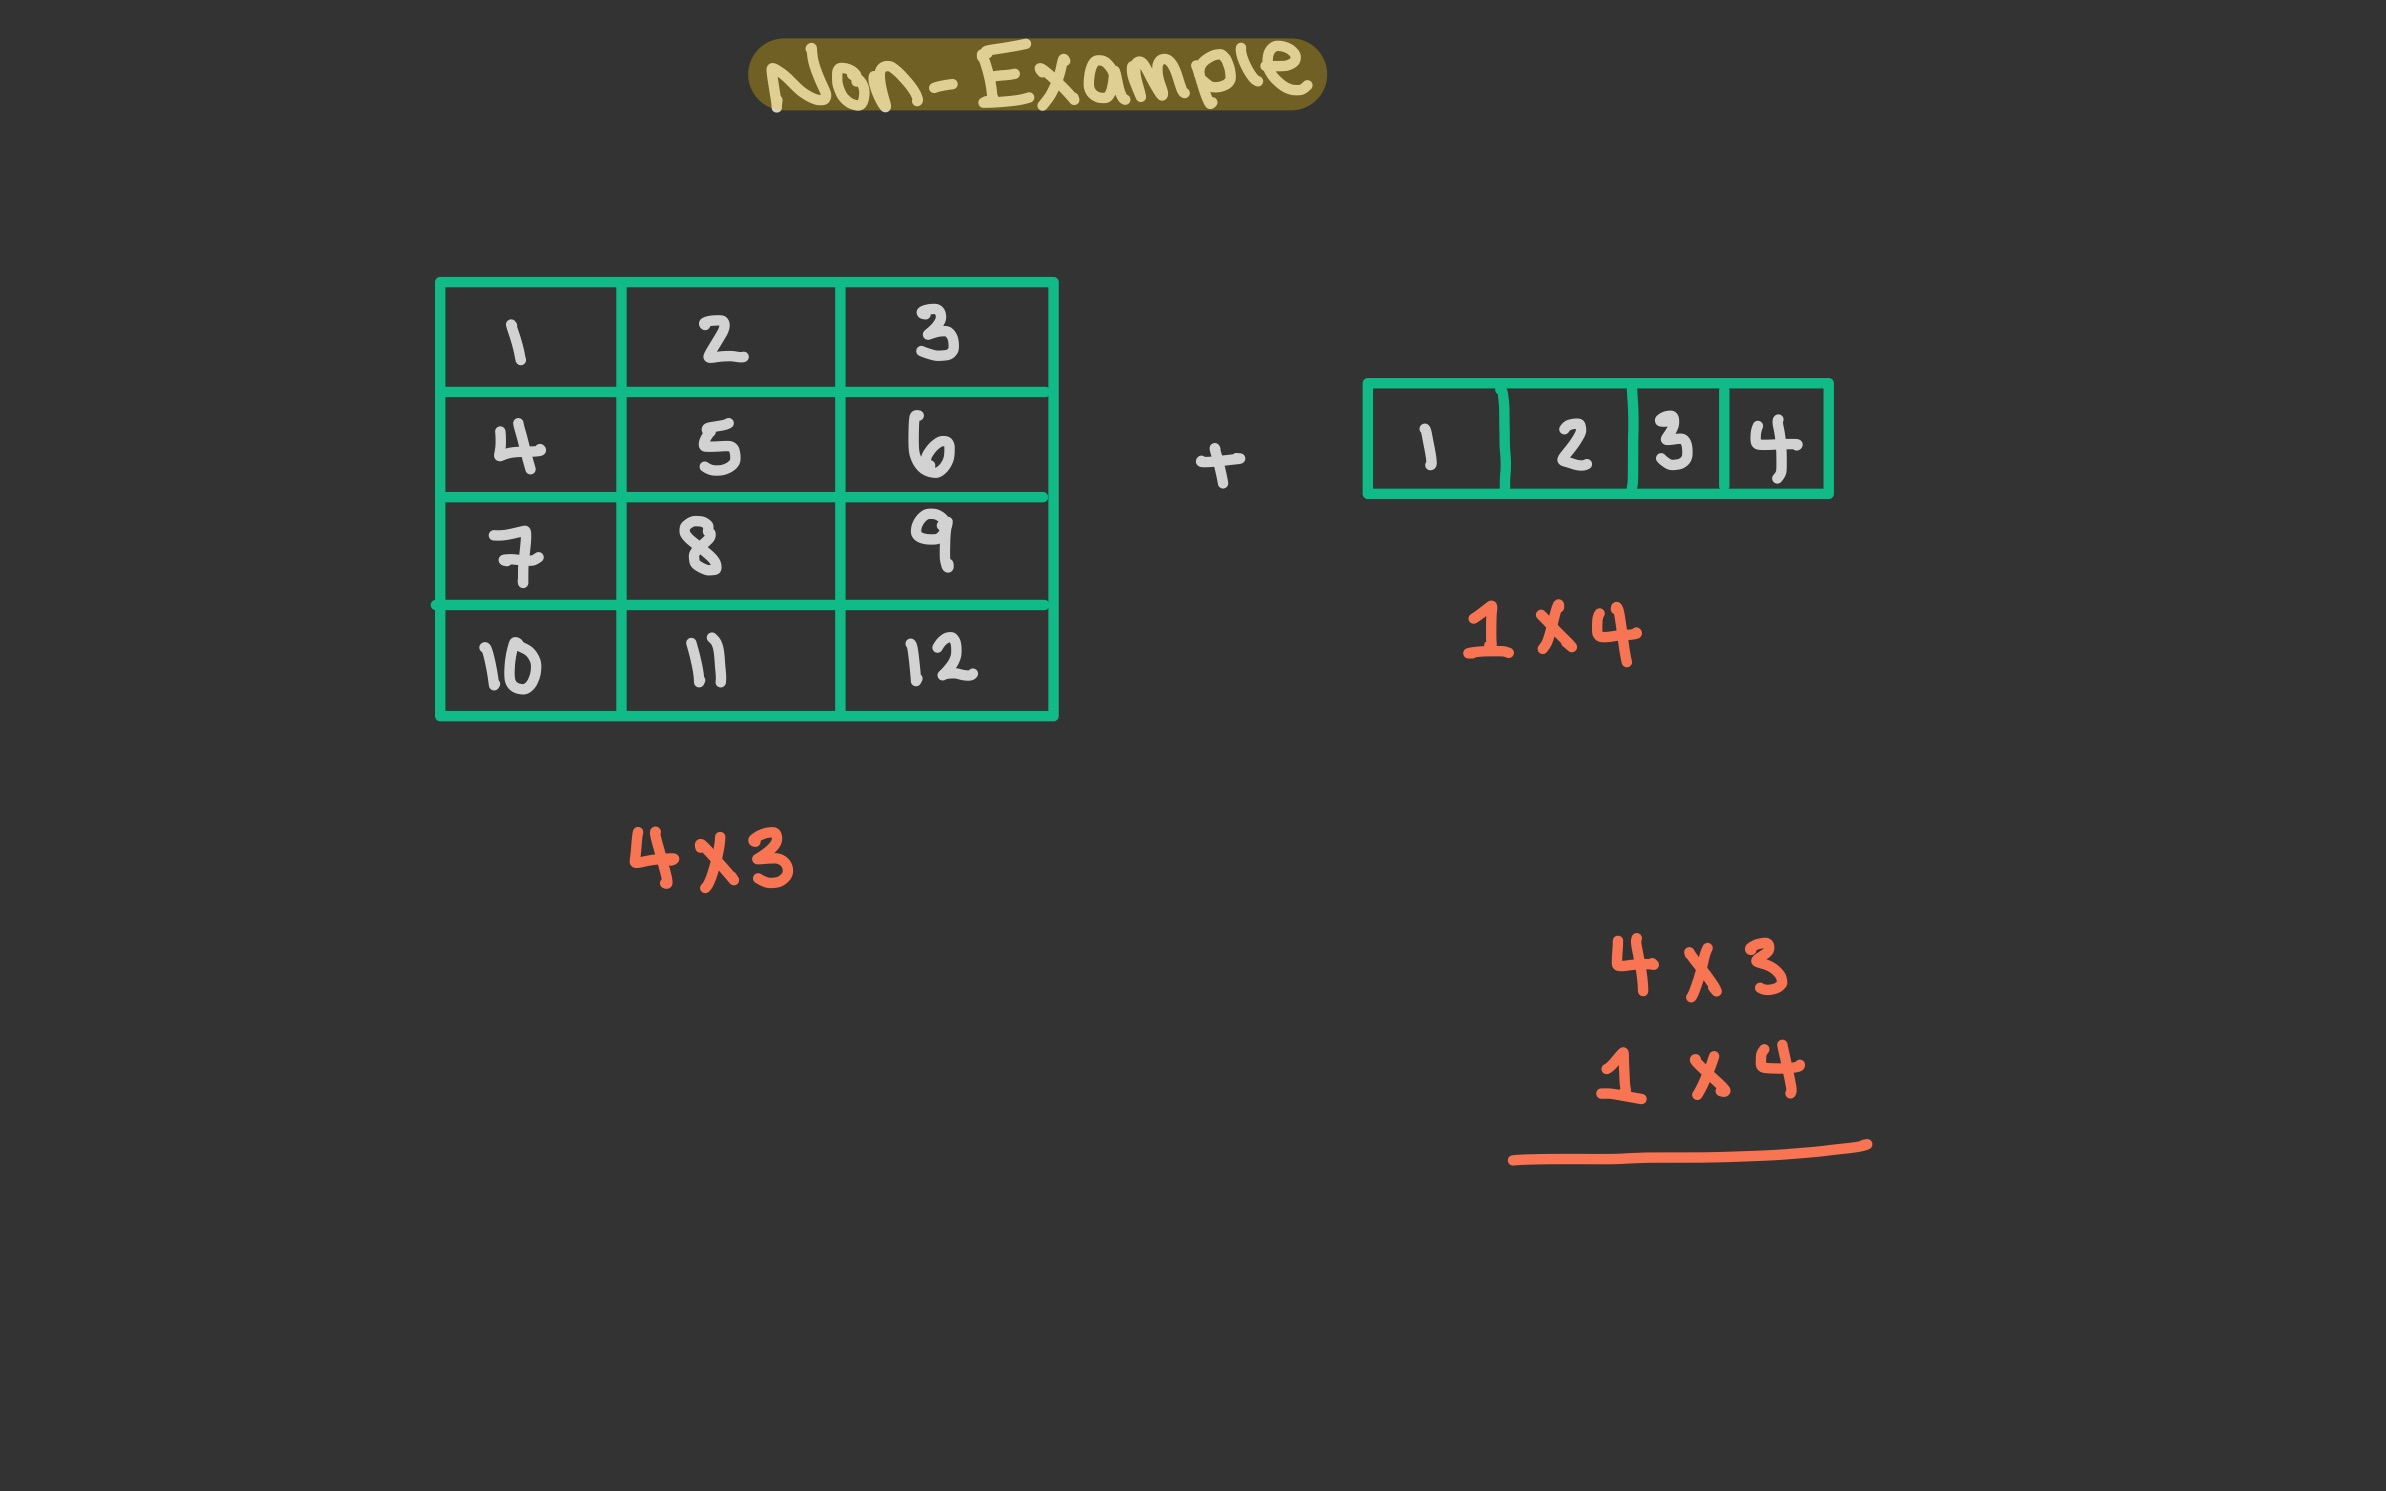

## Changing Rows and Columns, and examples of broadcasting

__Goal:__ Modify rows and columns of NumPy arrays.

* Construct The $4 \times 4$ matrix 

$
\begin{pmatrix}
0 & 0 & 0 & 0  \\
1 & 1 & 1 & 1  \\
2 & 2 & 2 & 2  \\
3 & 3 & 3 & 3  \\
\end{pmatrix}
$

In [19]:
import numpy as np

In [20]:
ThisMat = np.zeros((4,4), dtype=int)
print(ThisMat)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [21]:
for row in range(4):
    for col in range(4):
        ThisMat[row, col] = row
print(ThisMat)

[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]


In [22]:
ThisMat[3] +3

array([6, 6, 6, 6])

In [23]:
ThisMat[:,3] + 3   #even though I referenced a column, the output is given as a row, it only has 1-dim.

array([3, 4, 5, 6])

In [24]:
ThisMat[:,3] = ThisMat[:,3] + 3
print(ThisMat)

[[0 0 0 3]
 [1 1 1 4]
 [2 2 2 5]
 [3 3 3 6]]


In [25]:
ThisMat[:,3] += 3   #This shortcut works in Python, and it didn't work in Matlab!
print(ThisMat)

[[0 0 0 6]
 [1 1 1 7]
 [2 2 2 8]
 [3 3 3 9]]


One strategy: loop on the rows of `ThisMat`, add `n` to each row

In [26]:
ThisMat = np.zeros((4,4), dtype=int)
for n in range(4):
    ThisMat[n] += n   #shortcut for ThisMat[n] = ThisMat[n] + n
print(ThisMat)

[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]


In [27]:
ThisMat[1]

array([1, 1, 1, 1])

In [28]:
ThisMat[1,0]

1

Recall: `np.arange` is the numpy array version of `range`

In [29]:
print([0, 1, 2, 3])
np.array([0,1,2,3])

[0, 1, 2, 3]


array([0, 1, 2, 3])

In [30]:
print(range(4))
np.arange(4)  #Still computationally efficient, even though all elements are listed

range(0, 4)


array([0, 1, 2, 3])

Loopless strategy: broadcast using addition, which takes + `np.arange(4)` across the (4,4) array of zeros.

In [31]:
ThatMat = np.zeros((4,4), dtype=int)
print(ThatMat)
ThatMat = ThatMat + np.arange(4)
ThatMat

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

In [32]:
ThatMat.T    #Transpose of ThatMat. Rows swap to Columns, and vice versa.

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3]])

Alternative approach: Replace every row with `np.arange(4)` with careful slicing, then take the transpose

In [33]:
OurMat = np.zeros((4,4), dtype=int)
OurMat[1] = np.arange(4)
print(OurMat)

[[0 0 0 0]
 [0 1 2 3]
 [0 0 0 0]
 [0 0 0 0]]


In [34]:
OurMat = np.zeros((4,4), dtype=int)
OurMat[:] = np.arange(4)  #replace all rows with np.arange(4). The shape broadcasts across the entire array
print(OurMat)
print() #blank line, for spacing the outputs
print(OurMat.T)

[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]

[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]


Now what if we wanted to broadcast across the columns instead of the rows? It's possible if we can change the shape of `np.arange(4)` into a column

In [35]:
np.arange(4).T #Does not change with a transpose. This is because there is only one dimension to its shape

array([0, 1, 2, 3])

In [36]:
print(np.arange(4).shape)
print(np.arange(4).ndim)

(4,)
1


There are 2 possible workarounds: Write an array by hand or reshape the array

In [37]:
np.array([[0], [1], [2] ,[3]]) #A little annoying to write, even though it's only 4 entries

array([[0],
       [1],
       [2],
       [3]])

In [38]:
np.array([[0, 1, 2, 3]]).T  #Slightly less annoying, but still hard for longer arrays. Double [[ ]] required for 2-dimensional array and transpose.

array([[0],
       [1],
       [2],
       [3]])

In [39]:
np.arange(4).reshape(4,1)  #Best method overall!

array([[0],
       [1],
       [2],
       [3]])

In [40]:
arr = np.zeros((4,4), dtype=int)
print(arr)
print()
z = np.arange(4).reshape(4,1)
print(z)
arr = arr + z
print()
print(arr)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]

[[0]
 [1]
 [2]
 [3]]

[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]


In [41]:
arr[3]

array([3, 3, 3, 3])

In [42]:
arr[3] = [2,10]

ValueError: could not broadcast input array from shape (2,) into shape (4,)

The error basically says "I don't know how to stretch a length 2 array into a length 4 array".

In [43]:
arr[3] = [2,10,2,10]
arr

array([[ 0,  0,  0,  0],
       [ 1,  1,  1,  1],
       [ 2,  2,  2,  2],
       [ 2, 10,  2, 10]])

In [44]:
arr[0] = 5
arr

array([[ 5,  5,  5,  5],
       [ 1,  1,  1,  1],
       [ 2,  2,  2,  2],
       [ 2, 10,  2, 10]])

In [45]:
arr[:,0:2] = 99
arr

array([[99, 99,  5,  5],
       [99, 99,  1,  1],
       [99, 99,  2,  2],
       [99, 99,  2, 10]])

The above are examples of something called broadcasting, which we'll see next in lecture.

In [46]:
[1,3,4,7].reshape(4,1)   #lists cannot be reshaped. We need numpy arrays in order to reshape

AttributeError: 'list' object has no attribute 'reshape'

In [47]:
arr.shape

(4, 4)

In [48]:
w = np.array([1,3,4,7])

In [49]:
w.shape

(4,)

In [50]:
w.reshape(2,2)

array([[1, 3],
       [4, 7]])

### Further examples with broadcasting

Below, compare the results of adding `v1 + v2` versus adding  `A1 + A2`

In [51]:
import numpy as np

In [52]:
v1 = np.arange(7).reshape(1,7)
print(v1)
print()
A1 = np.zeros((8,7), dtype = int) + v1
print(A1)

[[0 1 2 3 4 5 6]]

[[0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]]


In [53]:
v2 = np.arange(8).reshape(8,1)
print(v2)
print()
A2 = np.zeros((8,7), dtype = int) + v2
print(A2)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]]

[[0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5]
 [6 6 6 6 6 6 6]
 [7 7 7 7 7 7 7]]


In [54]:
v1+v2

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 1,  2,  3,  4,  5,  6,  7],
       [ 2,  3,  4,  5,  6,  7,  8],
       [ 3,  4,  5,  6,  7,  8,  9],
       [ 4,  5,  6,  7,  8,  9, 10],
       [ 5,  6,  7,  8,  9, 10, 11],
       [ 6,  7,  8,  9, 10, 11, 12],
       [ 7,  8,  9, 10, 11, 12, 13]])

In [55]:
A1 + A2

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 1,  2,  3,  4,  5,  6,  7],
       [ 2,  3,  4,  5,  6,  7,  8],
       [ 3,  4,  5,  6,  7,  8,  9],
       [ 4,  5,  6,  7,  8,  9, 10],
       [ 5,  6,  7,  8,  9, 10, 11],
       [ 6,  7,  8,  9, 10, 11, 12],
       [ 7,  8,  9, 10, 11, 12, 13]])

In [56]:
v1+v2 == A1 + A2

array([[ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True]])

In [57]:
NewArr = np.arange(1,25).reshape(4,6)
NewArr

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24]])

Broadcasting a shape (4,6) array with a shape (1,6) array

In [58]:
NewArr + [[1, 1, 11, 1, 1, 1]]

array([[ 2,  3, 14,  5,  6,  7],
       [ 8,  9, 20, 11, 12, 13],
       [14, 15, 26, 17, 18, 19],
       [20, 21, 32, 23, 24, 25]])

In [59]:
np.array([[1, 1, 11, 1, 1, 1]]).shape

(1, 6)

Broadcasting a shape (4,6) array with a shape (6,) array is only different because of [ ] versus [[ ]]

In [60]:
NewArr + [1, 1, 11, 1, 1, 1]

array([[ 2,  3, 14,  5,  6,  7],
       [ 8,  9, 20, 11, 12, 13],
       [14, 15, 26, 17, 18, 19],
       [20, 21, 32, 23, 24, 25]])

In [61]:
np.array([1, 1, 11, 1, 1, 1]).shape

(6,)

Broadcasting a shape (4,6) array with a shape (4,) array is not possible. Nor with a shape (1,4) array. The dimension of length 4 is in the wrong spot

In [62]:
NewArr + [5 , 9, 0, 9]

ValueError: operands could not be broadcast together with shapes (4,6) (4,) 

In [63]:
NewArr + [[5 , 9, 0, 9]]

ValueError: operands could not be broadcast together with shapes (4,6) (1,4) 

We need a shape (4,1) array to broadcast into a shape (4,6) array. There are two good ways to create this:

In [64]:
vecbroadcast1 = np.array([5, 9, 0, 9]).reshape(-1,1)   #the -1 is replaced with whichever number makes this shape work, depending on number of elts.
print(vecbroadcast1)

[[5]
 [9]
 [0]
 [9]]


In [65]:
print(NewArr)
NewArr + vecbroadcast1

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]]


array([[ 6,  7,  8,  9, 10, 11],
       [16, 17, 18, 19, 20, 21],
       [13, 14, 15, 16, 17, 18],
       [28, 29, 30, 31, 32, 33]])

In [66]:
NewArr +  [[5], [9], [0], [9]]

array([[ 6,  7,  8,  9, 10, 11],
       [16, 17, 18, 19, 20, 21],
       [13, 14, 15, 16, 17, 18],
       [28, 29, 30, 31, 32, 33]])

Even More examples

In [67]:
a = np.arange(5).reshape(5,1)
b = np.arange(6).reshape(1,6)
c = np.arange(10,16)

print(a)
print(a.shape)
print()
print(b)
print(b.shape)
print()
print(c)
print(c.shape)
d = 15

[[0]
 [1]
 [2]
 [3]
 [4]]
(5, 1)

[[0 1 2 3 4 5]]
(1, 6)

[10 11 12 13 14 15]
(6,)


In [68]:
TheArr = np.arange(30).reshape(5,6)
print(TheArr)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]]


In [69]:
print(TheArr + a)
print(TheArr*a)

[[ 0  1  2  3  4  5]
 [ 7  8  9 10 11 12]
 [14 15 16 17 18 19]
 [21 22 23 24 25 26]
 [28 29 30 31 32 33]]
[[  0   0   0   0   0   0]
 [  6   7   8   9  10  11]
 [ 24  26  28  30  32  34]
 [ 54  57  60  63  66  69]
 [ 96 100 104 108 112 116]]


In [70]:
print(TheArr + b)
print(TheArr*b)

[[ 0  2  4  6  8 10]
 [ 6  8 10 12 14 16]
 [12 14 16 18 20 22]
 [18 20 22 24 26 28]
 [24 26 28 30 32 34]]
[[  0   1   4   9  16  25]
 [  0   7  16  27  40  55]
 [  0  13  28  45  64  85]
 [  0  19  40  63  88 115]
 [  0  25  52  81 112 145]]


In [71]:
TheArr[0::2] = c #replace every other row with c
print(TheArr)

[[10 11 12 13 14 15]
 [ 6  7  8  9 10 11]
 [10 11 12 13 14 15]
 [18 19 20 21 22 23]
 [10 11 12 13 14 15]]


In [72]:
TheArr[1:5:2] = TheArr[1:5:2] + b
print(TheArr)

[[10 11 12 13 14 15]
 [ 6  8 10 12 14 16]
 [10 11 12 13 14 15]
 [18 20 22 24 26 28]
 [10 11 12 13 14 15]]


In [73]:
print(TheArr) #before

print()

TheArr[1:5:2] += b #  += is a shortcut for TheArr[1:5:2] = TheArr[1:5:2] + b. We can also use *= and -= as shortcuts.
print(TheArr) #after

[[10 11 12 13 14 15]
 [ 6  8 10 12 14 16]
 [10 11 12 13 14 15]
 [18 20 22 24 26 28]
 [10 11 12 13 14 15]]

[[10 11 12 13 14 15]
 [ 6  9 12 15 18 21]
 [10 11 12 13 14 15]
 [18 21 24 27 30 33]
 [10 11 12 13 14 15]]


## Logic in base Python vs. Logic in NumPy

### General Rules

* In base Python: `and`, `or`, `not`
* In NumPy (and pandas): `&`, `|`, `~`   (note that `!=` is used for not equals)

In [74]:
import numpy as np

In [75]:
rng = np.random.default_rng()
n = 20
arr = rng.integers(-50,51, size=n)
mylist = list(arr)

In [76]:
mylist

[-48,
 46,
 38,
 -41,
 39,
 28,
 -13,
 -31,
 30,
 11,
 -45,
 -46,
 1,
 5,
 26,
 44,
 50,
 -10,
 -47,
 -31]

__Motivating Question:__ Find all entries in `arr` and `mylist` that are strictly between -10 and 10.

In [77]:
mylist < 10    #cannot compare an entire list to an integer. But does this work for an array?

TypeError: '<' not supported between instances of 'list' and 'int'

Let's start with the list. We'll do it with something called "list comprehension".

In [78]:
[x for x in mylist  if x < 10 and x > -10]

[1, 5]

In [79]:
smalllist = []
for x in mylist:
    if x < 10 and x > -10:
        smalllist.append(x)

print(smalllist)

[1, 5]


As an example, notice that if I use `&` there is no error. However, I want to avoid doing this. It won't always work the way you expect.

In [80]:
[x for x in mylist if (x > -10) & (x < 10)]

[1, 5]

For those of you that have seen Math 13, here are some examples of DeMorgan's Law (you don't need to know this for Math 9). Note that these results are the same as the output above.

In [81]:
[x for x in mylist if not((x <= -10) or (x >= 10))]

[1, 5]

In [82]:
[x for x in mylist if not(x <= -10) and not(x >= 10)]

[1, 5]

Now let's compare how we can handle this problem using arrays.

In [83]:
arr

array([-48,  46,  38, -41,  39,  28, -13, -31,  30,  11, -45, -46,   1,
         5,  26,  44,  50, -10, -47, -31], dtype=int64)

In [84]:
arr < 10

array([ True, False, False,  True, False, False,  True,  True, False,
       False,  True,  True,  True,  True, False, False, False,  True,
        True,  True])

Now, let's practice with NumPy arrays.

In [85]:
bool = (arr > -10) & (arr < 10)   #success! It works similar to Matlab
print(bool)

[False False False False False False False False False False False False
  True  True False False False False False False]


This is an example of a boolean array. For each entry of `arr` it returns `True` if the corresponding entry is between -10 and 10, and `False` otherwise.

In [86]:
arr[bool] #again like Matlab! Return the elements corresponding to True indices

array([1, 5], dtype=int64)

In [87]:
arr[(arr > -10) & (arr < 10)] 

array([1, 5], dtype=int64)

This is an example of boolean indexing.

Below is the same type of negation and DeMorgan's Law we saw with lists

In [88]:
(arr <= -10) | (arr >=10)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True])

In [89]:
~(arr <= -10) | (arr >=10)

array([False,  True,  True, False,  True,  True, False, False,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False, False])

In [90]:
arr[~((arr <= -10) | (arr >= 10))]

array([1, 5], dtype=int64)

In [91]:
~(arr <=-10) & ~(arr >=10)

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False])

In [92]:
arr[~(arr <= -10) & ~(arr >= 10)]

array([1, 5], dtype=int64)

In [93]:
#Notice we get an error, need & symbol in numpy, the word and does not work.
(arr > -10) and (arr < 10)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

**Note:** Logical negation uses `~`, while not equals uses `!=`

In [94]:
arr != 3

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

## The `axis` keyword argument

__Motivating Question from experimental probability:__ If you roll 4 distinct 6-sided dice, what is the probability that the largest value is 5?

The code below models rolling 4 dice.

In [95]:
import numpy as np

In [96]:
rng = np.random.default_rng()

In [97]:
four_rolls = rng.integers(1,7,size=4)
print(four_rolls)

[2 3 5 5]


In [98]:
np.max(four_rolls)

5

In [99]:
four_rolls.max()

5

Let's start by coding this is the way we're most familiar with.

In [100]:
exp = 10  #number of experiments
s = 0  #number of successes
for i in range(exp):
    if np.max(rng.integers(1,7,size=4)) == 5:  #if the max of 4 rolls equals 5, all in one line. Can expand this to more lines if it's easier for you.
        s += 1 #shorthand for s = s+1
s/exp    #number of successes / number of experiments is the experimental probability

0.0

for-loops are extremely slow! We'll see that in just a minute. Remember the Jupyter magic `%%timeit` – the `it` means iteration, and it runs the code a number of times and computes average time. This will be too slow for this example, so we'll use `%%time`.

In [101]:
%%time
exp = 10**6
s = 0
for i in range(exp):
    if np.max(rng.integers(1,7,size=4)) == 5:
        s += 1 #shorthand for s = s+1
s/exp

CPU times: total: 29.9 s
Wall time: 30.5 s


0.284184

In [102]:
exp = 10
arr = rng.integers(1,7,size=(exp,4))
print(arr)

[[3 5 6 2]
 [4 4 6 5]
 [5 2 5 4]
 [4 1 4 5]
 [5 2 2 2]
 [4 1 1 3]
 [5 1 6 1]
 [6 1 2 6]
 [1 2 6 5]
 [5 3 3 3]]


Here, each row of the array represents an experiment.

The first method I'm going to show you is extremely flexible in that it will work for really any function I want – the drawback is that it will also be quite slow.

In [103]:
help(np.apply_along_axis)

Help on _ArrayFunctionDispatcher in module numpy:

apply_along_axis(func1d, axis, arr, *args, **kwargs)
    Apply a function to 1-D slices along the given axis.

    Execute `func1d(a, *args, **kwargs)` where `func1d` operates on 1-D arrays
    and `a` is a 1-D slice of `arr` along `axis`.

    This is equivalent to (but faster than) the following use of `ndindex` and
    `s_`, which sets each of ``ii``, ``jj``, and ``kk`` to a tuple of indices::

        Ni, Nk = a.shape[:axis], a.shape[axis+1:]
        for ii in ndindex(Ni):
            for kk in ndindex(Nk):
                f = func1d(arr[ii + s_[:,] + kk])
                Nj = f.shape
                for jj in ndindex(Nj):
                    out[ii + jj + kk] = f[jj]

    Equivalently, eliminating the inner loop, this can be expressed as::

        Ni, Nk = a.shape[:axis], a.shape[axis+1:]
        for ii in ndindex(Ni):
            for kk in ndindex(Nk):
                out[ii + s_[...,] + kk] = func1d(arr[ii + s_[:,] + kk])

    

`axis` simply means the direction I want to do the computation along.

In [104]:
print(arr)

[[3 5 6 2]
 [4 4 6 5]
 [5 2 5 4]
 [4 1 4 5]
 [5 2 2 2]
 [4 1 1 3]
 [5 1 6 1]
 [6 1 2 6]
 [1 2 6 5]
 [5 3 3 3]]


In [105]:
np.max(arr)  #Maximum out of all 40 entries

6

In [106]:
np.apply_along_axis(np.max, axis=1, arr=arr)

array([6, 6, 5, 5, 5, 4, 6, 6, 6, 5], dtype=int64)

In [107]:
np.apply_along_axis(np.max, axis=1, arr=arr) == 5

array([False, False,  True,  True,  True, False, False, False, False,
        True])

Try to predict what will happen when I run the following:

In [108]:
np.apply_along_axis(np.max, axis=0, arr=arr)

array([6, 5, 6, 6], dtype=int64)

In [109]:
exp = 10
arr = rng.integers(1,7,size=(exp,4))
(np.apply_along_axis(np.max,axis=1,arr=arr) == 5).mean()   #Recall: Numpy interprets True as 1 and False as 0 in numerical computations

0.4

Now, let's time this with $10^6$ experiments. You might be surprised to see that it's still pretty slow.

In [110]:
%%time
exp = 10**6
arr = rng.integers(1,7,size=(exp,4))
(np.apply_along_axis(np.max,axis=1,arr=arr) == 5).mean()

CPU times: total: 11 s
Wall time: 11.1 s


0.284594

The reason this is slower than we expect is because `np.apply_along_axis` is not optimized for this kind of computation. It has to be flexible enough to work with almost any function we give it. 

Important note: some methods of the numpy package directly also apply to individual arrays. for instance, we can take the max of `arr` with `arr.max` instead of `np.max`

In [111]:
print(arr.max())
print(np.max(arr))

6
6


In [112]:
np.max(arr, axis=1)

array([3, 2, 6, ..., 4, 5, 4], dtype=int64)

In [113]:
arr.max(axis=1)

array([3, 2, 6, ..., 4, 5, 4], dtype=int64)

In [114]:
exp = 10
arr = rng.integers(1,7,size=(exp,4))
(arr.max(axis=1) == 5).mean()

0.0

In [115]:
#1-Dimensional
(arr.max(axis=1) == 5)

array([False, False, False, False, False, False, False, False, False,
       False])

In [116]:
arr.max(axis=1).shape

(10,)

In [117]:
#axis = 0 is the default
(arr.max(axis=1) == 5).mean(axis=0)

0.0

The following throws and error, since the array only has one dimension. We only talk about `axis=1` when there are at least two dimensions.

In [118]:
(arr.max(axis=1) == 5).mean(axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [119]:
help(arr.max)

Help on built-in function max:

max(...) method of numpy.ndarray instance
    a.max(axis=None, out=None, keepdims=False, initial=<no value>, where=True)

    Return the maximum along a given axis.

    Refer to `numpy.amax` for full documentation.

    See Also
    --------
    numpy.amax : equivalent function



In [120]:
%%time
exp = 10**6
arr = rng.integers(1,7,size=(exp,4))
(arr.max(axis=1) == 5).mean()

CPU times: total: 46.9 ms
Wall time: 43.8 ms


0.285435

Wow! So fast!

## More on the `axis` keyword argument

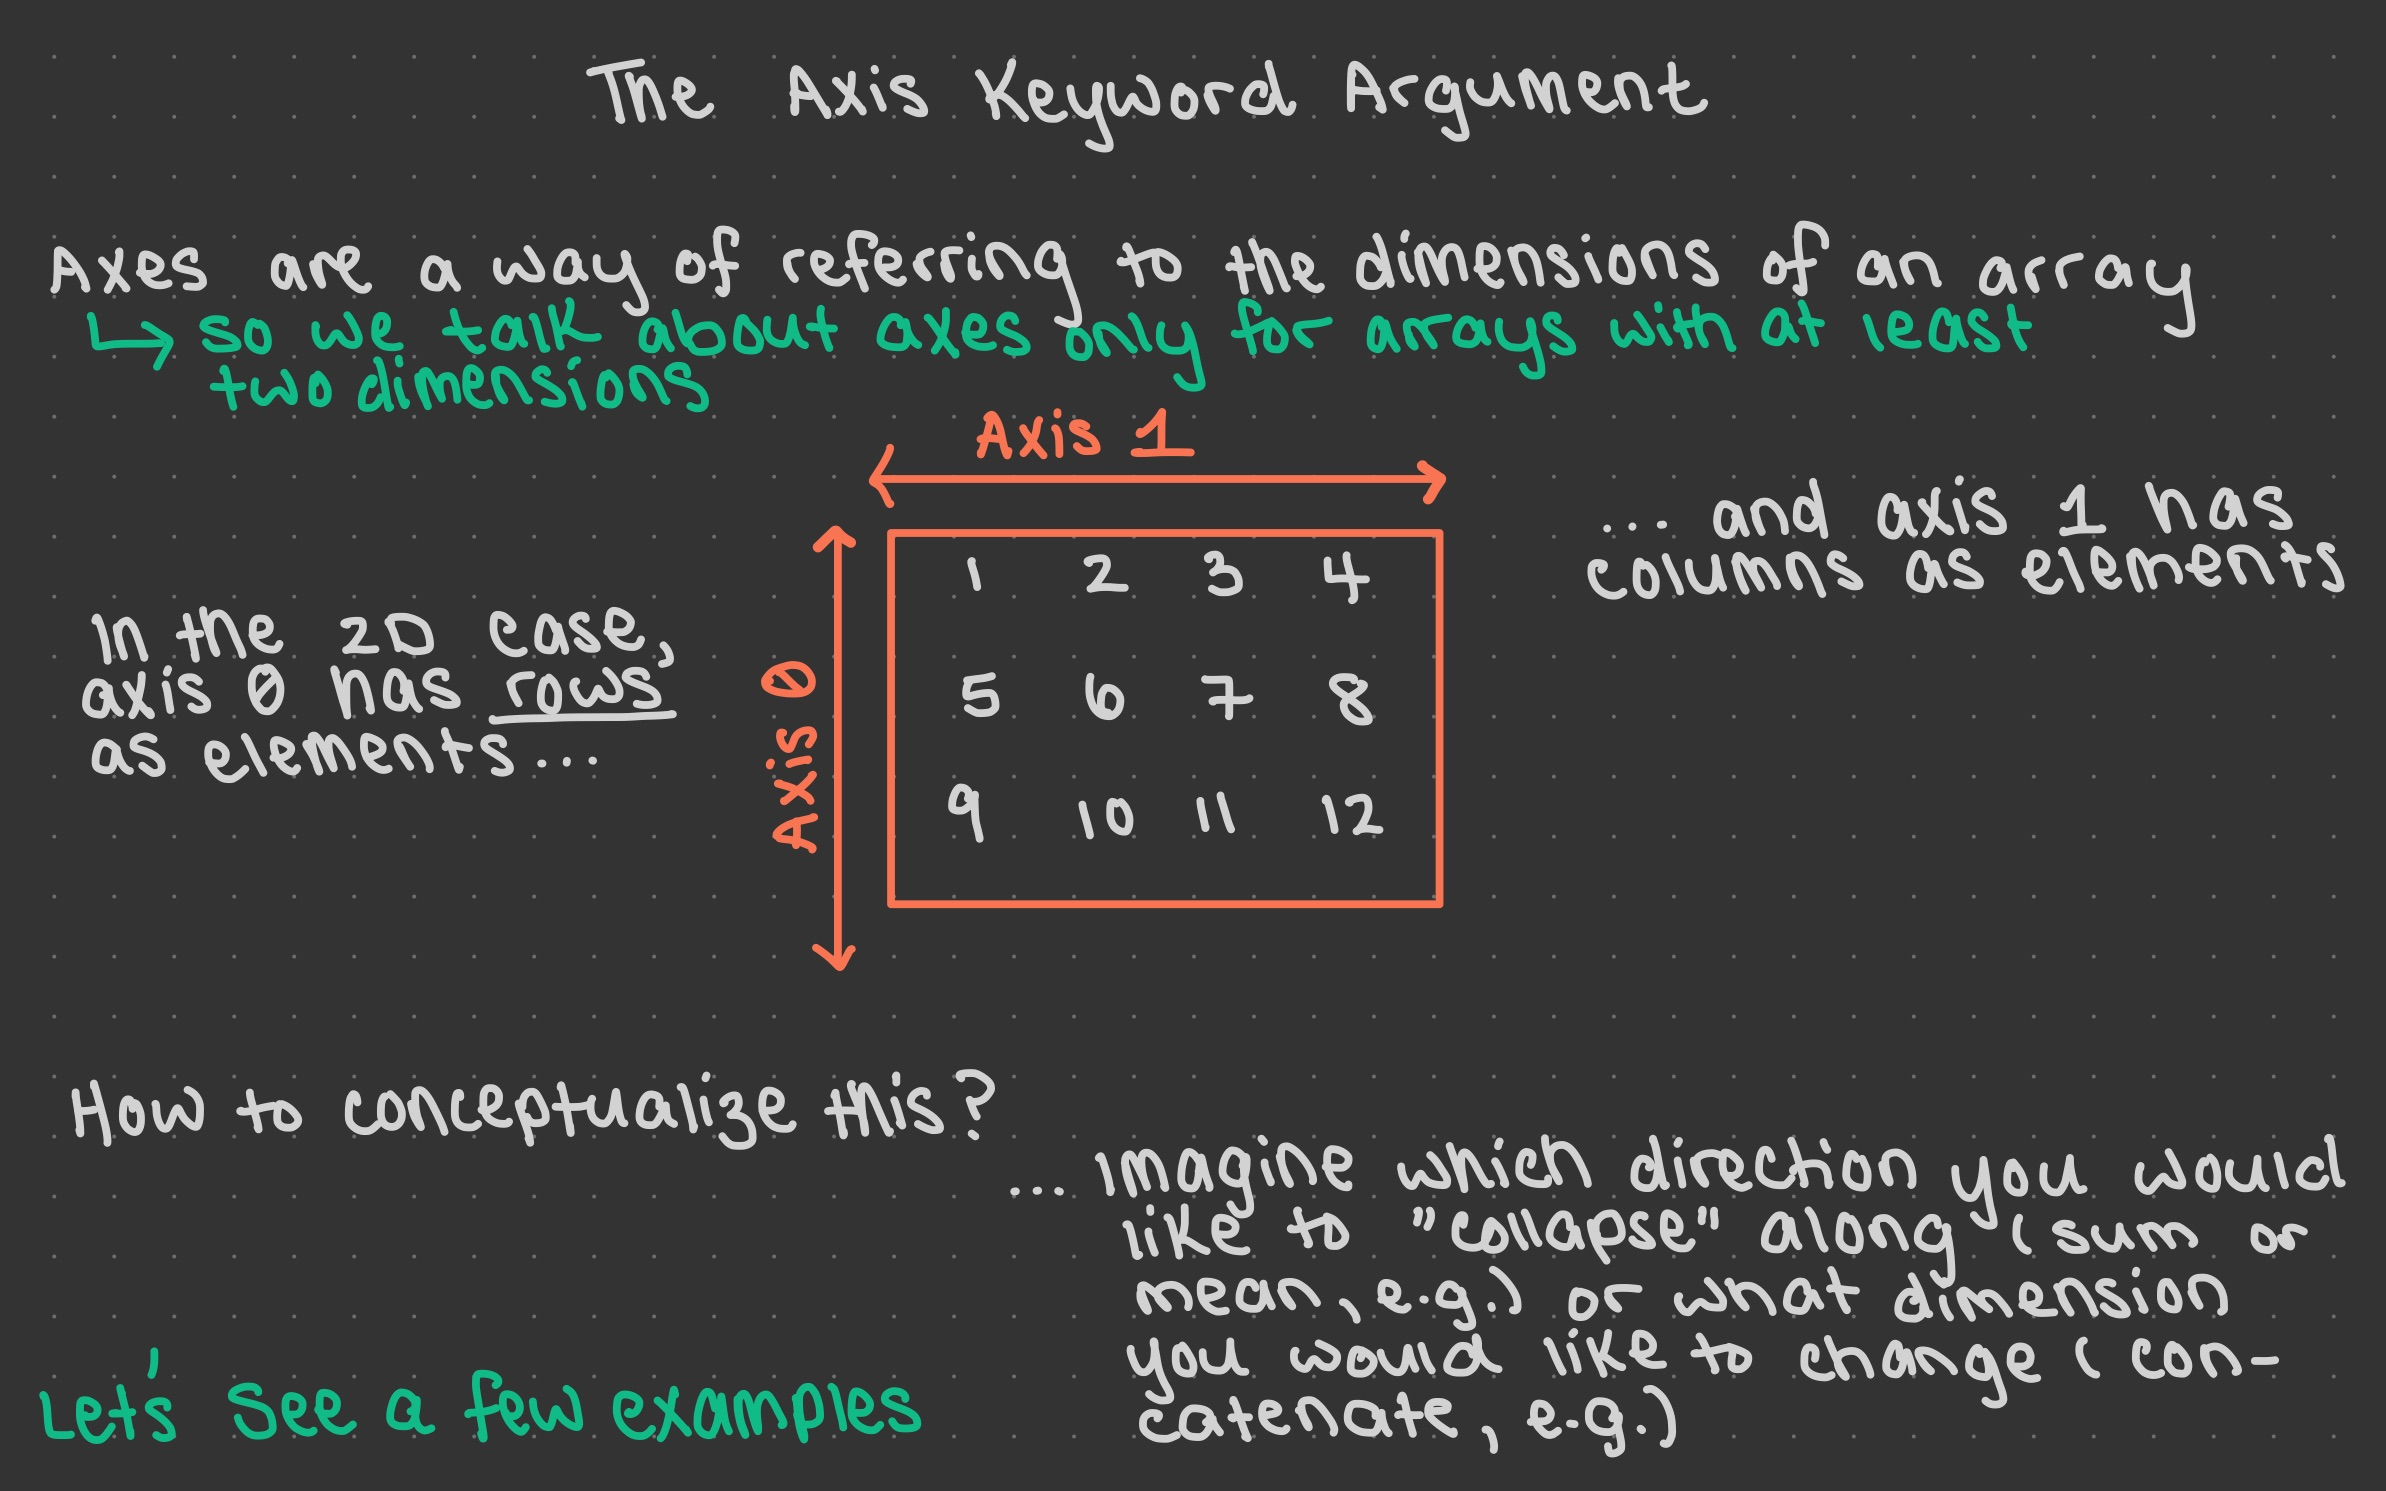
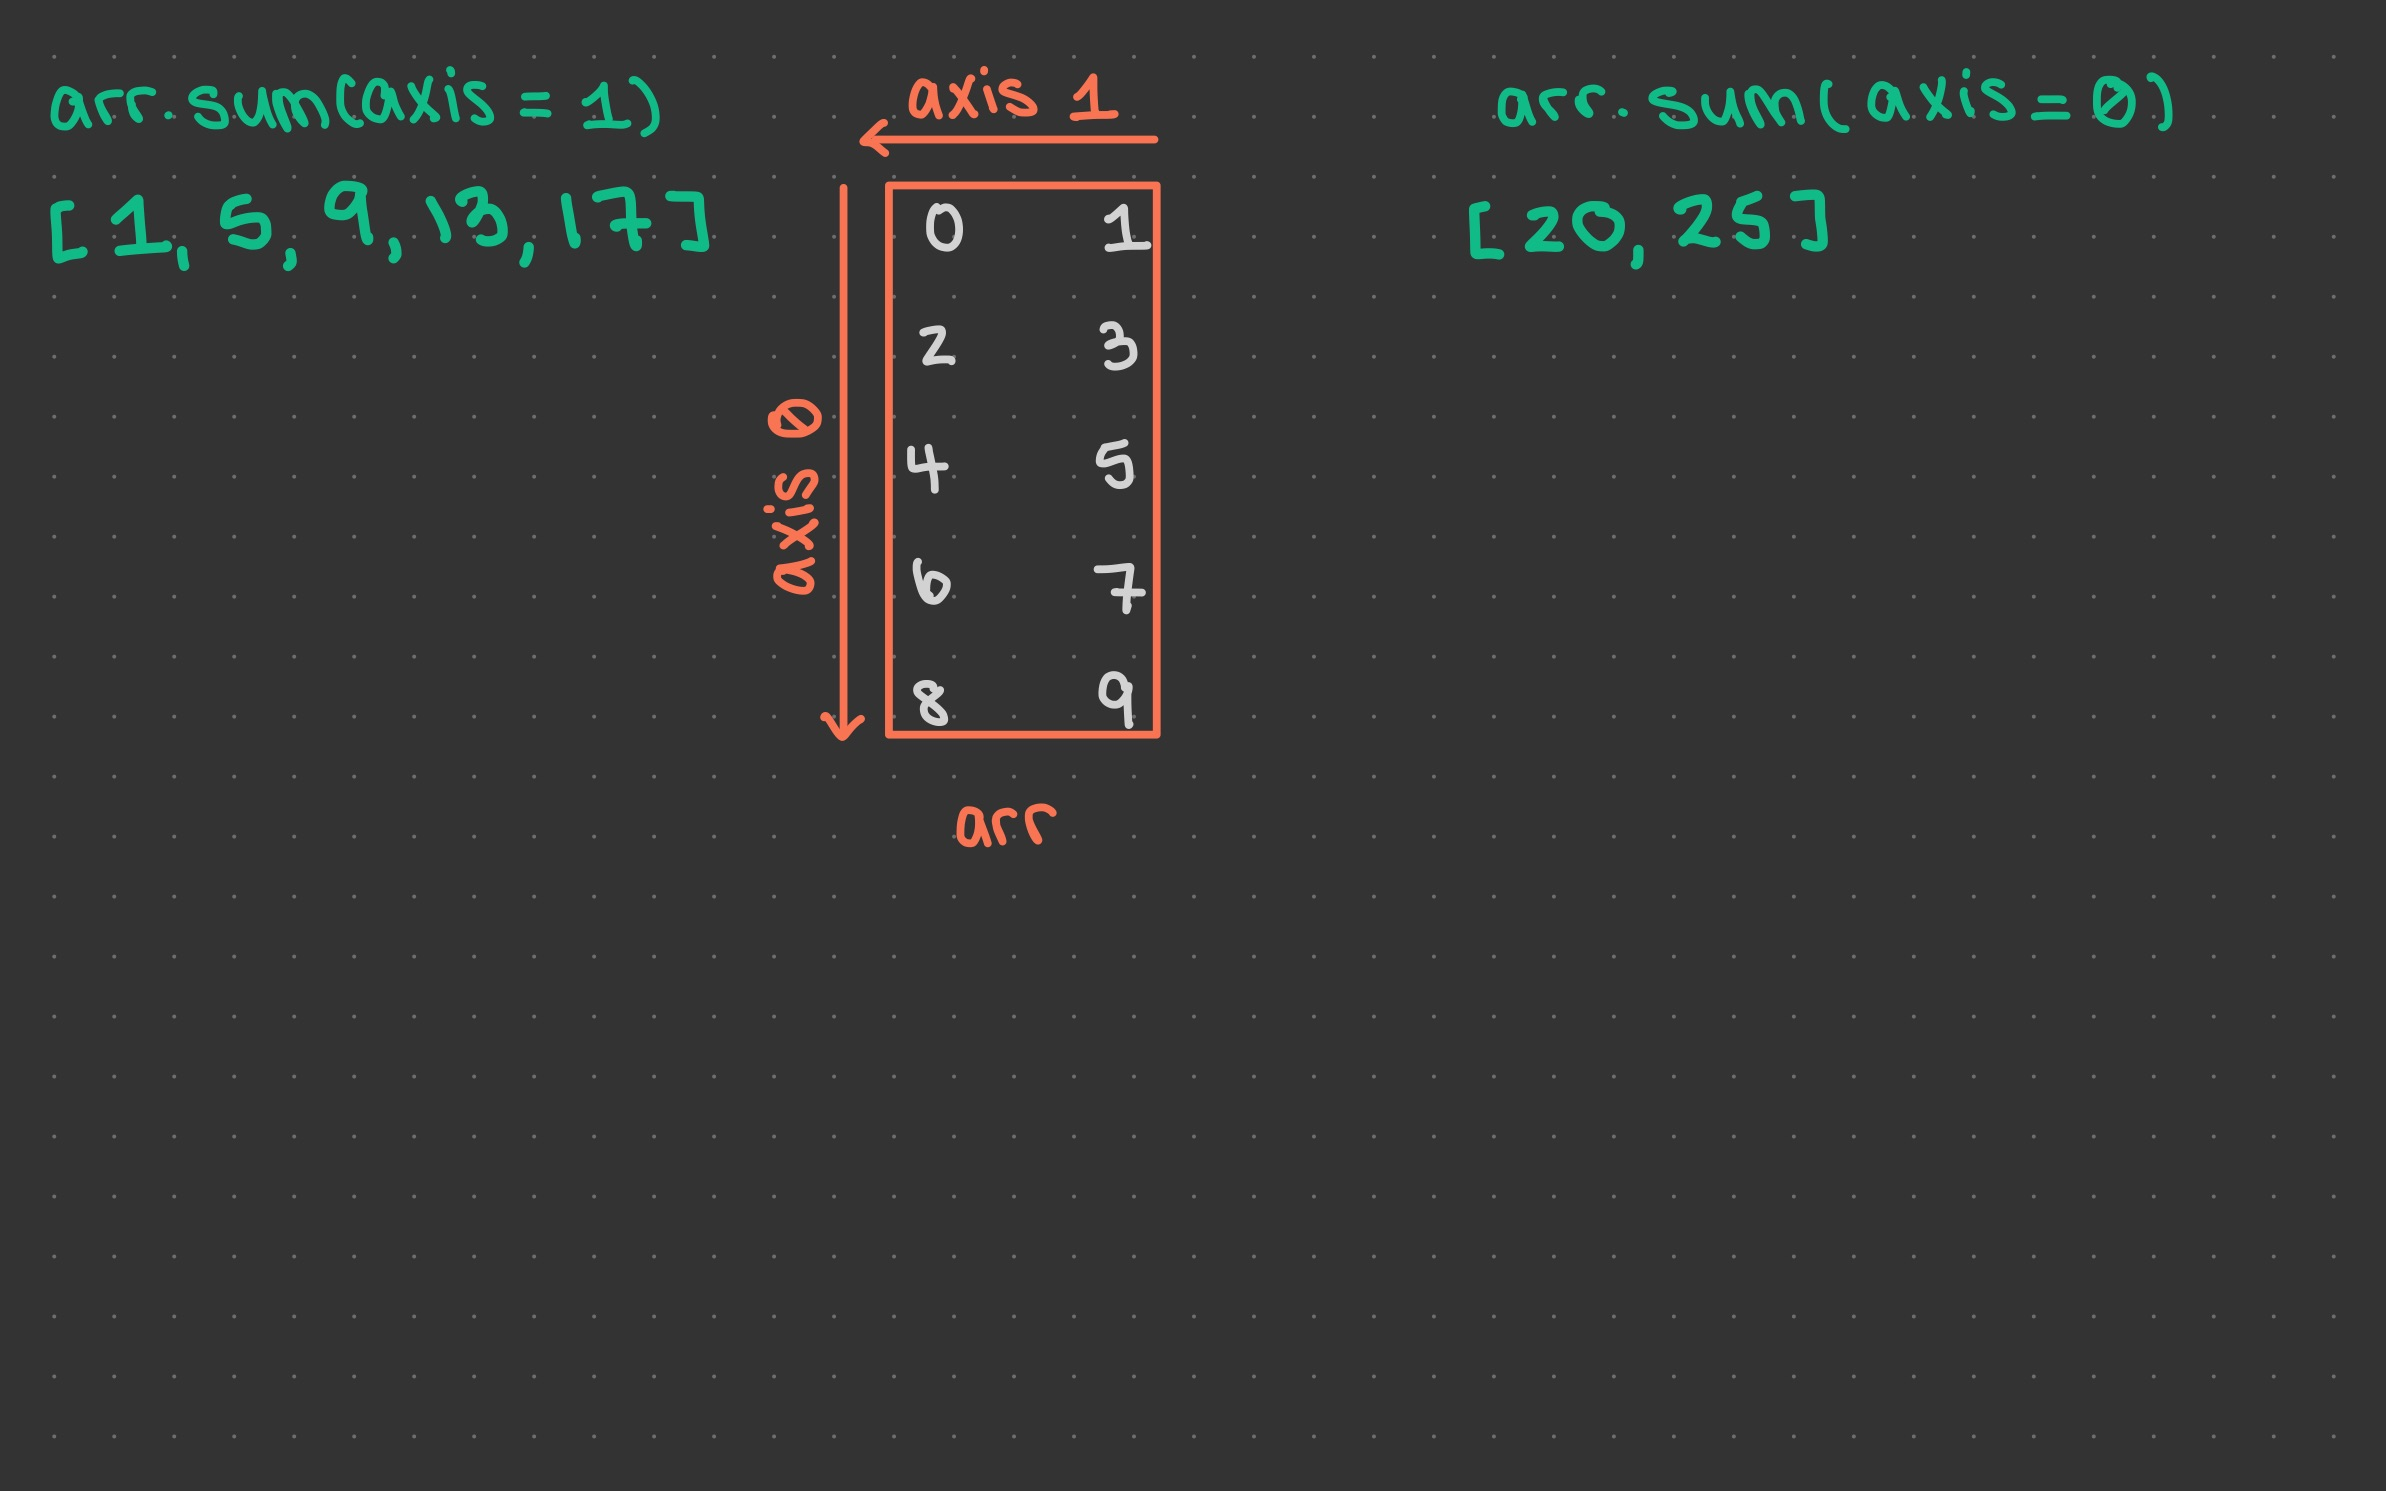
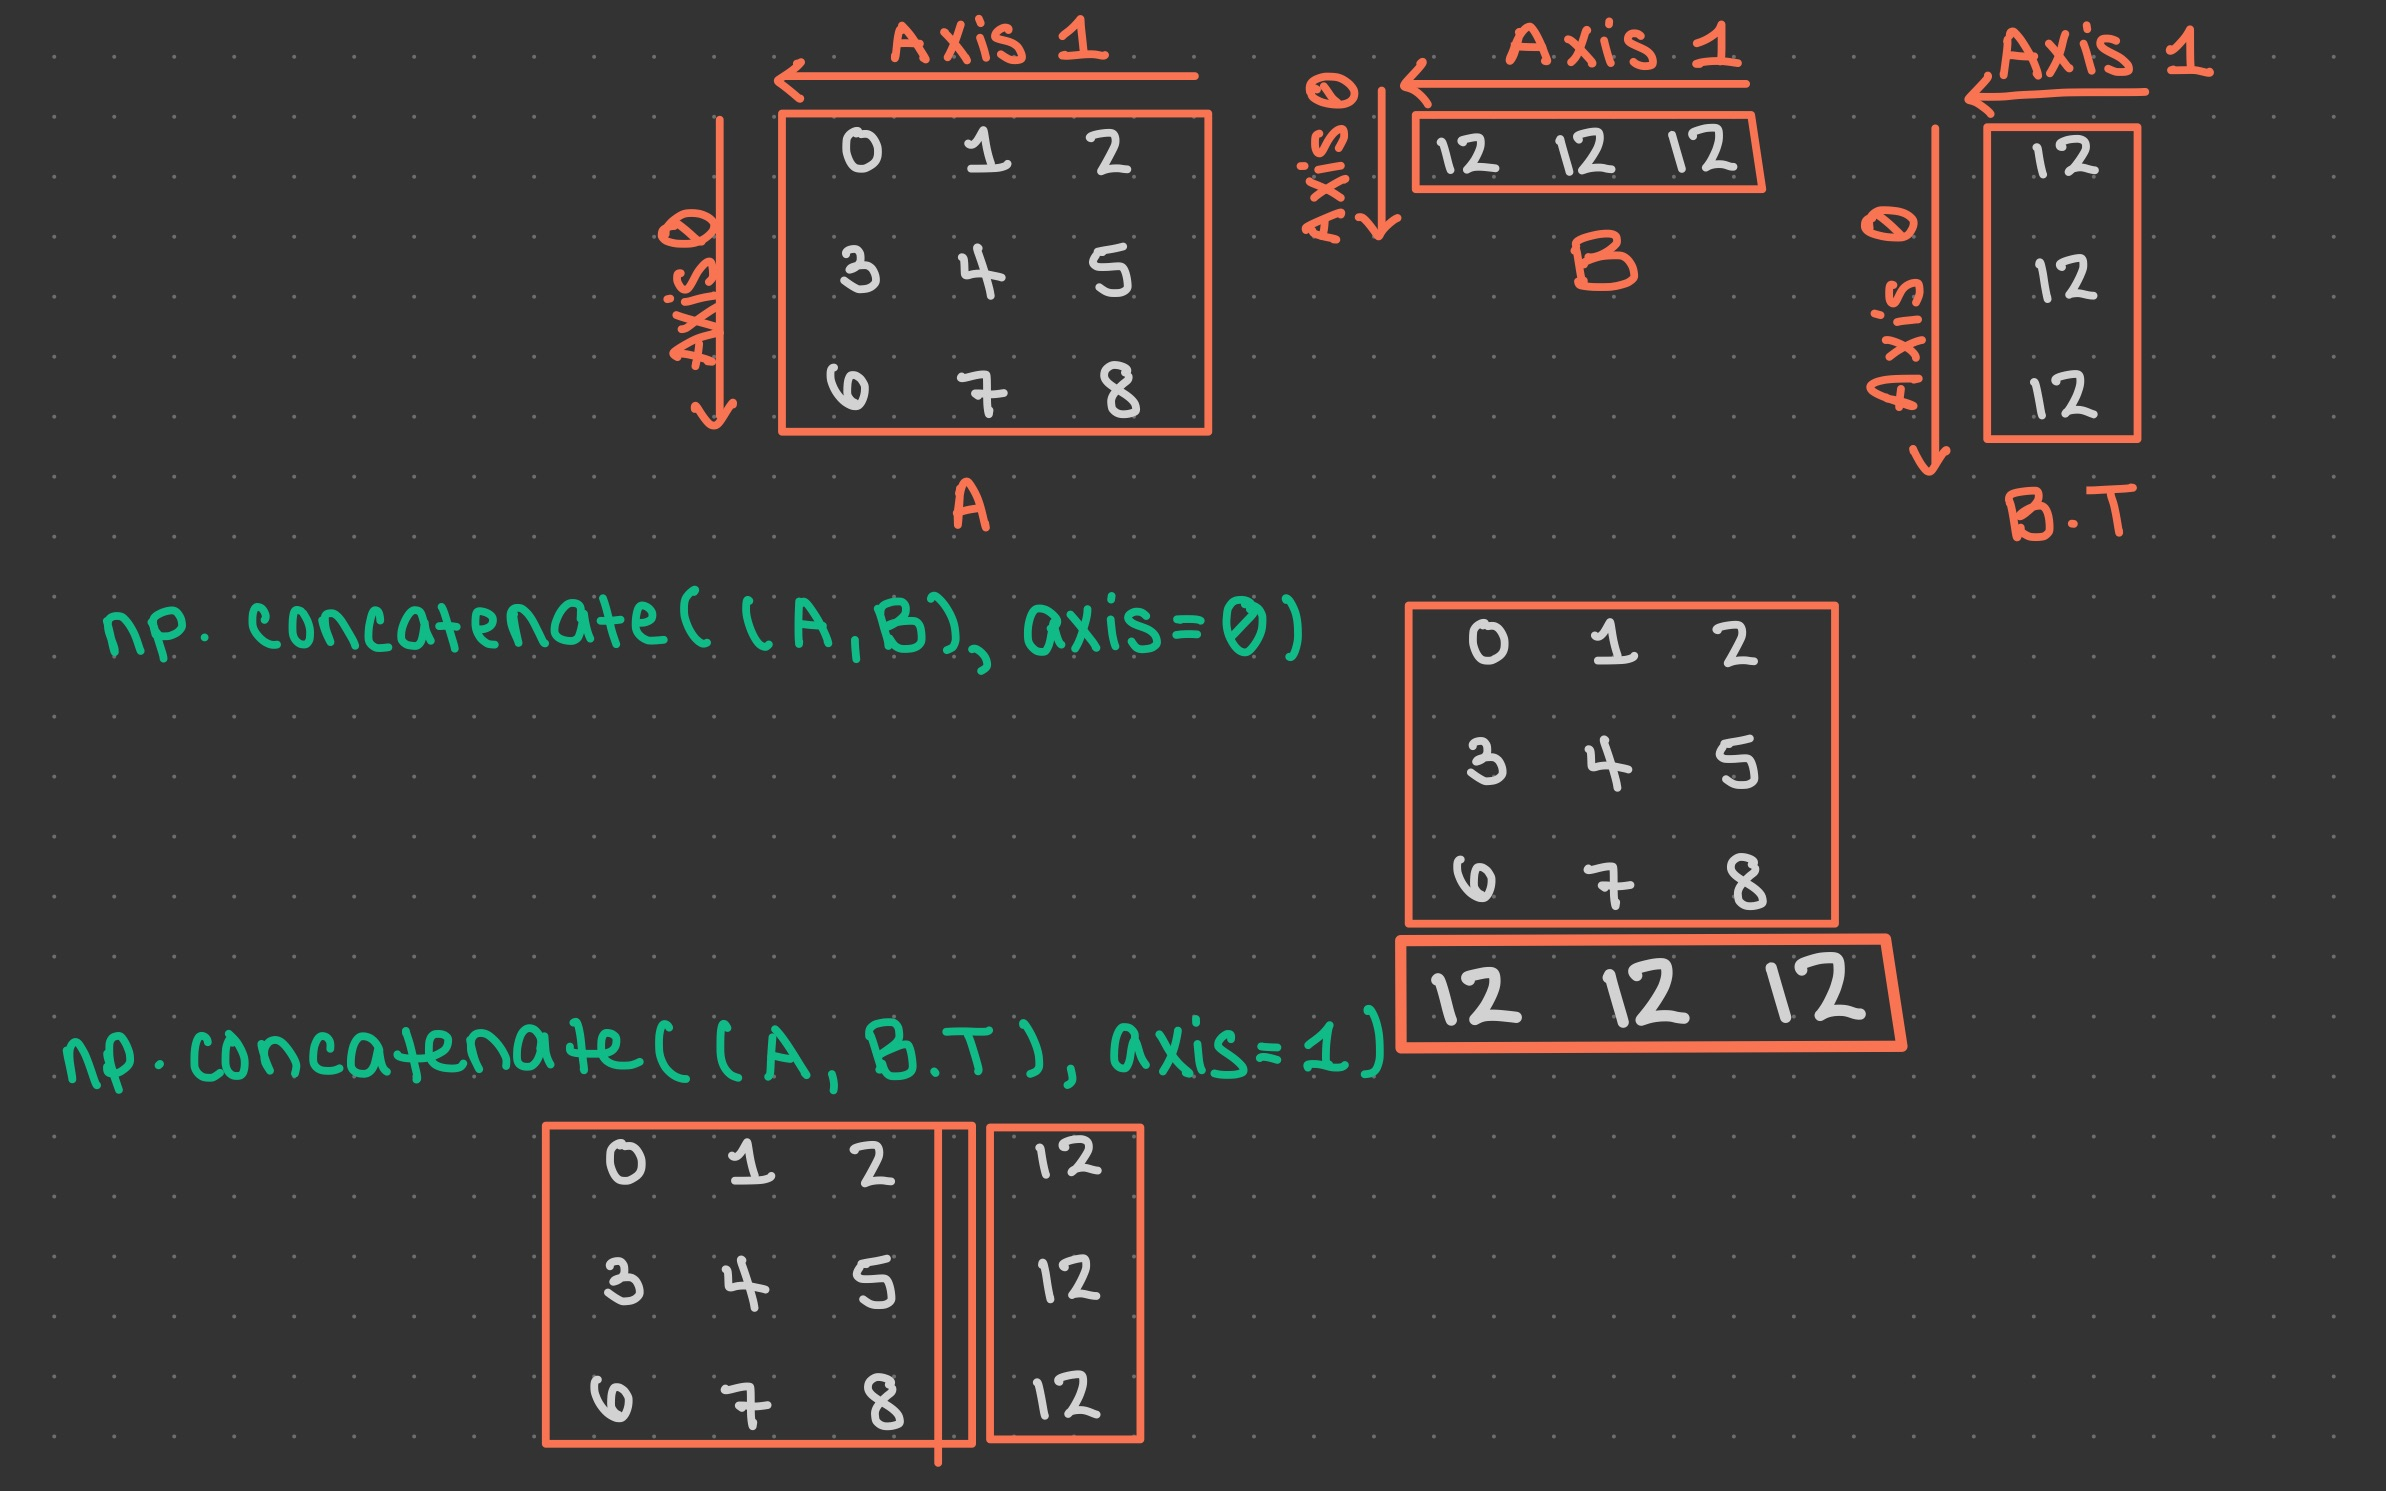